In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import os 
from scipy.interpolate import UnivariateSpline
from scipy.misc import derivative
from numba import jit



#Como de bien hace la derivada segunda? Pruebas numericas

In [ ]:
def log(x):
    return np.log(x)

def d_log_aux(x):
    return (1/x)

d_log=np.vectorize(d_log_aux)

def dd_log_aux(x):
    return -1/x**2

dd_log=np.vectorize(dd_log_aux)

In [ ]:

x=np.linspace(0.1,20,1000)
y=log(x)
y_spl = UnivariateSpline(x,y,s=0,k=4)
y_spl_1=y_spl.derivative(n=1)
y_spl_2=y_spl.derivative(n=2)


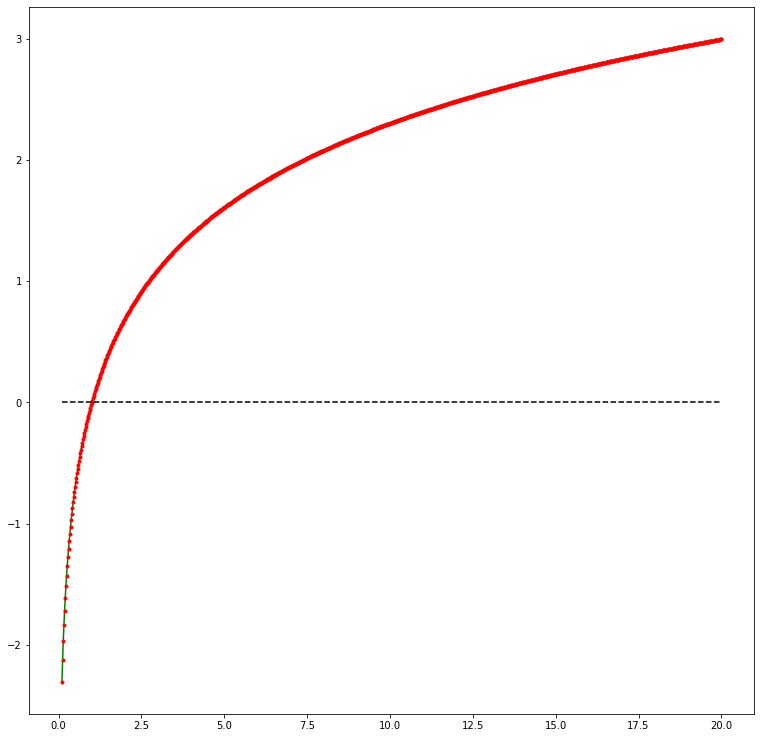

In [ ]:
plt.figure(figsize=(13,13))
plt.plot(x,y,"g-")
plt.plot(x,y_spl(x),"r.")
plt.plot(x,abs(y-y_spl(x)),"k--")

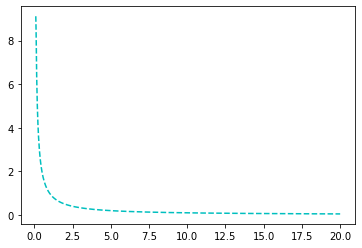

In [ ]:
dy=np.gradient(y)
dx=np.gradient(x)
grad_1=dy/dx
plt.plot(x,grad_1,"c--")


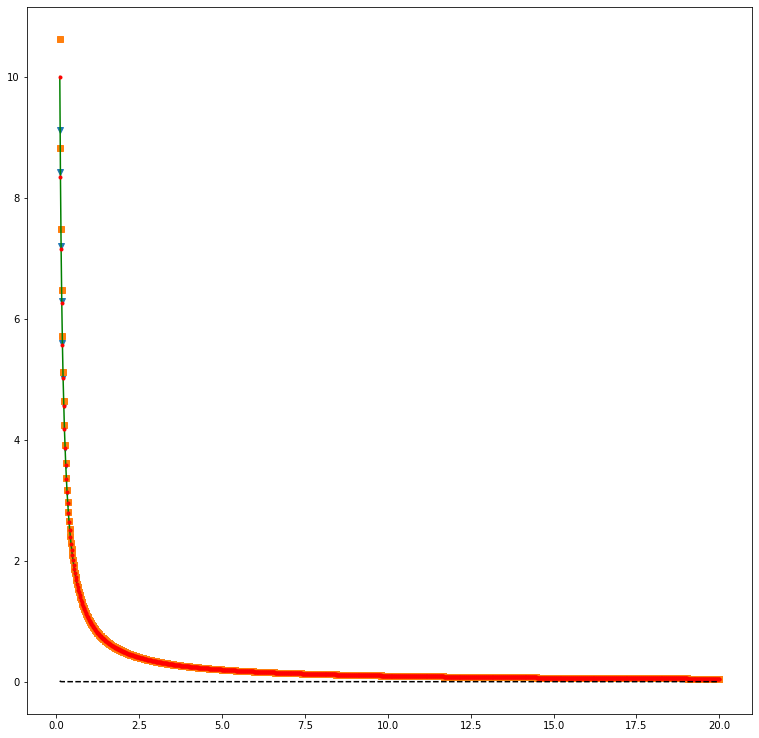

In [ ]:
plt.figure(figsize=(13,13))
grad=derivative(y_spl,x,dx=0.05)
plt.plot(x,grad_1,"v")
plt.plot(x,grad,"s")
plt.plot(x,d_log(x),"g-")
plt.plot(x,y_spl_1(x),"r.")
plt.plot(x,abs(d_log(x)-y_spl_1(x)),"k--")

In [ ]:
ddy=np.gradient(grad_1)
grad_2=ddy/dx

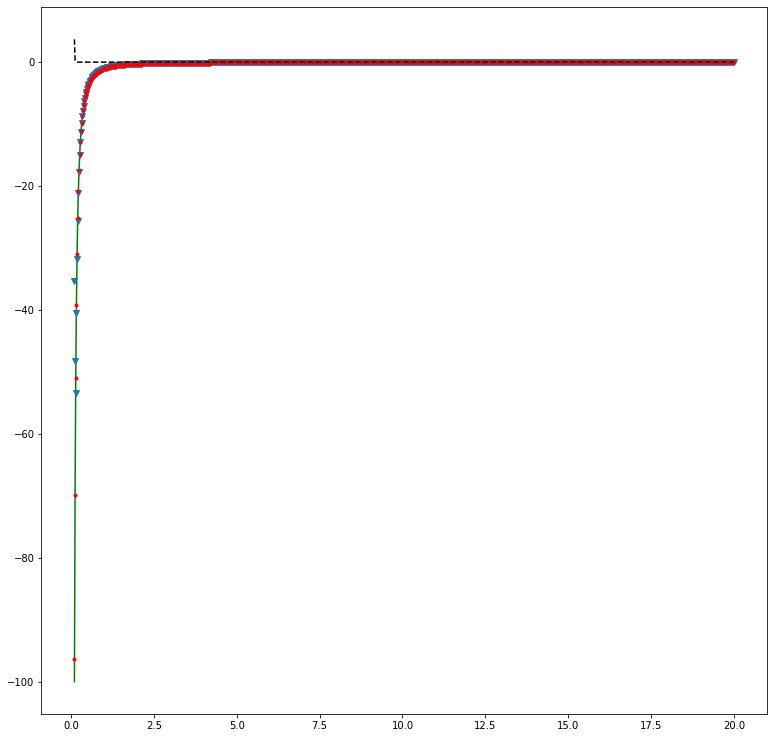

In [ ]:
plt.figure(figsize=(13,13))
plt.plot(x,dd_log(x),"g-")
plt.plot(x,grad_2,"v")

plt.plot(x,y_spl_2(x),"r.")
plt.plot(x,abs(dd_log(x)-y_spl_2(x)),"k--")

In [ ]:
x=np.linspace(0.1,50,10000)
T=0.2
e=10
G=2e18
y=smooth(x,T,e,G)
y_spl = UnivariateSpline(x,y,s=0,k=4)
y_spl_1=y_spl.derivative(n=1)
y_spl_2=y_spl.derivative(n=2)

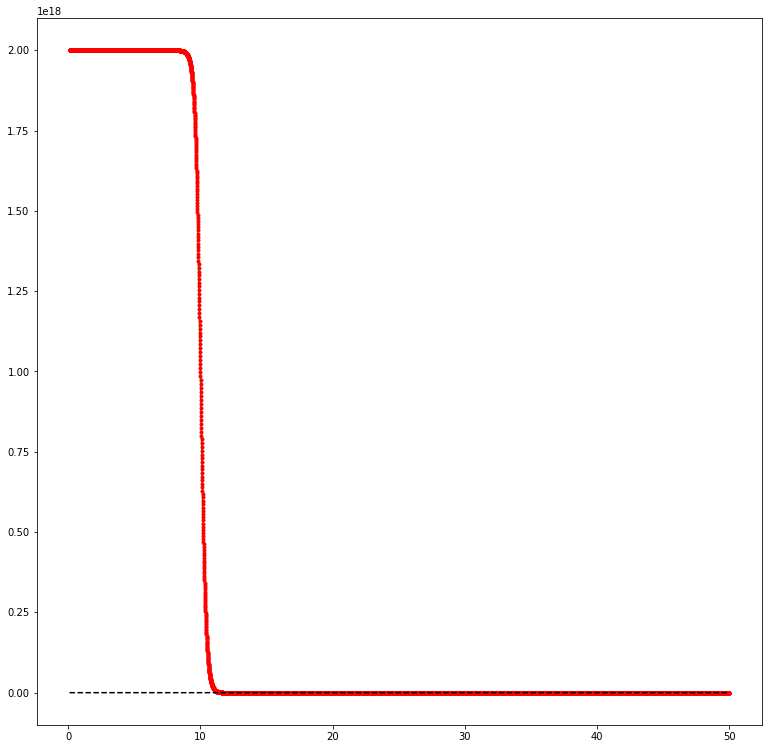

In [ ]:
plt.figure(figsize=(13,13))
plt.plot(x,y,"g-")
plt.plot(x,y_spl(x),"r.")
plt.plot(x,abs(y-y_spl(x)),"k--")

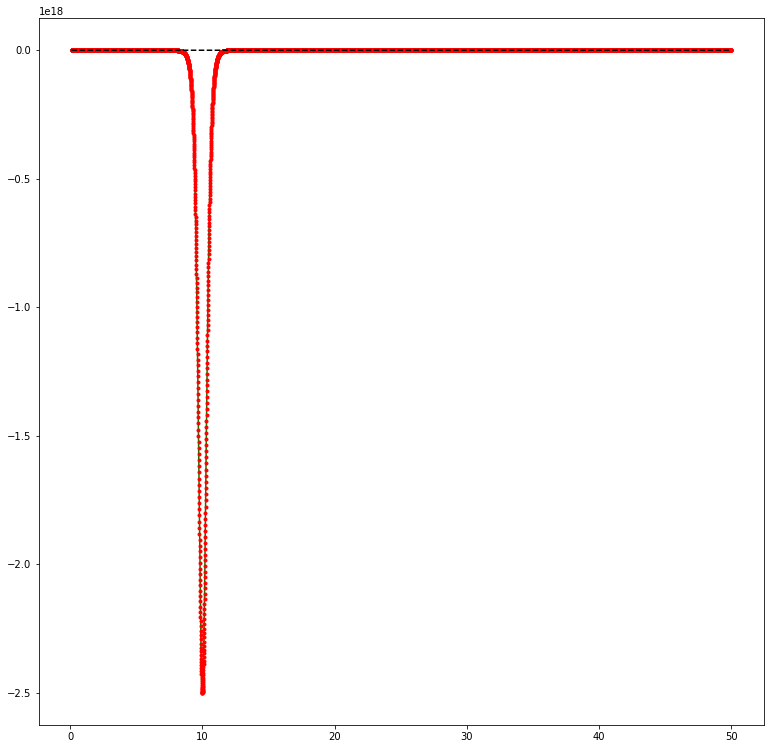

In [ ]:
plt.figure(figsize=(13,13))
plt.plot(x,d_smooth(x,T,e,G),"g-")
plt.plot(x,y_spl_1(x),"r.")
plt.plot(x,abs(d_smooth(x,T,e,G)-y_spl_1(x)),"k--")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars


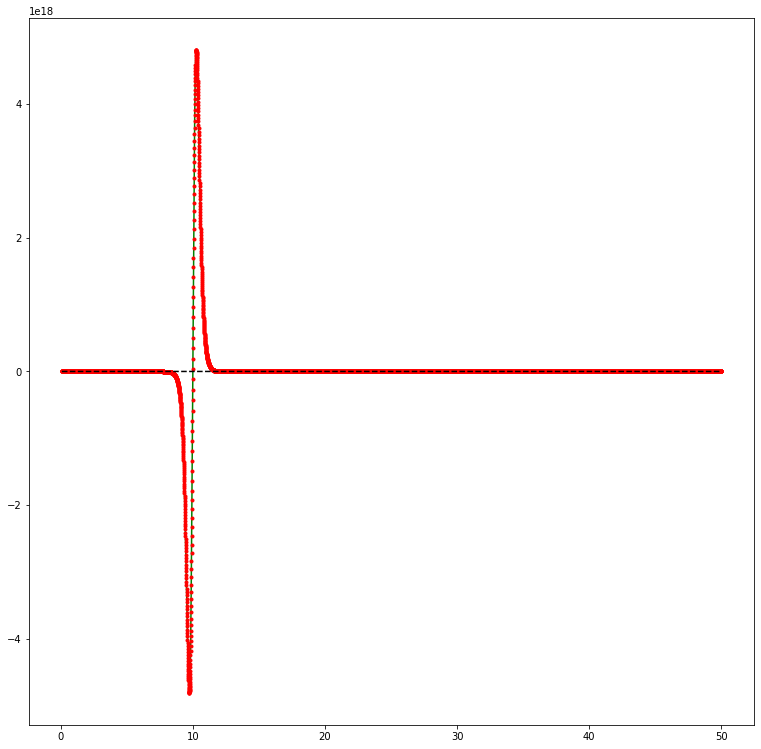

In [ ]:
plt.figure(figsize=(13,13))
plt.plot(x,dd_smooth(x,T,e,G),"g-")
plt.plot(x,y_spl_2(x),"r.")
plt.plot(x,abs(dd_smooth(x,T,e,G)-y_spl_2(x)),"k--")

#Resultados PRUEBA 1

In [ ]:
def smoothstep(x,T,e,G):
    aux=G/(1+np.exp((x-e)/T))
    return aux
smooth=np.vectorize(smoothstep)
def smoothstep_inv(x,T,e):
    aux=(1+np.exp((x-e)/T))
    return aux

def d_smoothstep_inv(x,T,e):
    return np.exp((x-e)/T)/T

def d_smoothstep_aux(x,T,e,G):
    return -G*d_smoothstep_inv(x,T,e)/(smoothstep_inv(x,T,e))**2

d_smooth=np.vectorize(d_smoothstep_aux)


def dd_smoothstep_aux(x,T,e,G):
    return -G*(d_smoothstep_inv(x,T,e)/T *(smoothstep_inv(x,T,e))**2 -d_smoothstep_inv(x,T,e)*2*smoothstep_inv(x,T,e)*d_smoothstep_inv(x,T,e))/(smoothstep_inv(x,T,e))**4
dd_smooth=np.vectorize(dd_smoothstep_aux)


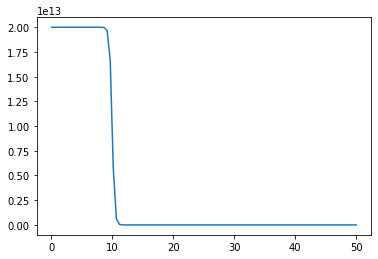

In [ ]:
x=np.linspace(0.1,50,100)
y=smooth(x,0.2,10,2e13)

plt.plot(x,y)

In [ ]:
def heav_step(x,a,b,c):
    if x<=a:
        return 1*b
    else: 
        return c
step=np.vectorize(heav_step)

In [ ]:
x=np.linspace(0,10,100)
y=step(x,5,1e13)

In [ ]:
y_spl = UnivariateSpline(x,y,s=0,k=4)

In [ ]:
x=np.linspace(0,50,2000)
n=np.zeros(2000)
n_spl = UnivariateSpline(x,n,s=0,k=4)
n_spl_1d = n_spl.derivative(n=1)

n_spl_2d = n_spl.derivative(n=2)
n_lista=[n]
n_lista_spl=[n_spl(x)]
dd_n_lista=[n_spl_2d(x)]
vars_list=[]
dt=1e-8
taun=0.1e-6
Dp=36.19
Gopt=smooth(x,3,10,2e18)
for i in range(10000):
    n_spl = UnivariateSpline(x,n,s=0,k=4)
    n_spl_2d = n_spl.derivative(n=2)
    var_aux=Gopt-n/taun +Dp*n_spl_2d(x)
    n=n+dt*var_aux
    dd_n_lista.append(n_spl_2d(x))
    vars_list.append(var_aux)
    n_lista_spl.append(n_spl(x))
    n_lista.append(n)

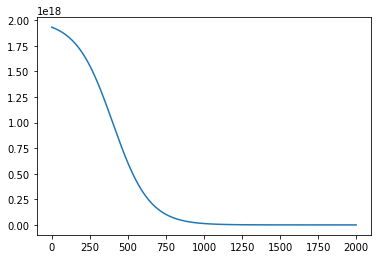

In [ ]:
plt.plot(smooth(x,3,10,2e18))


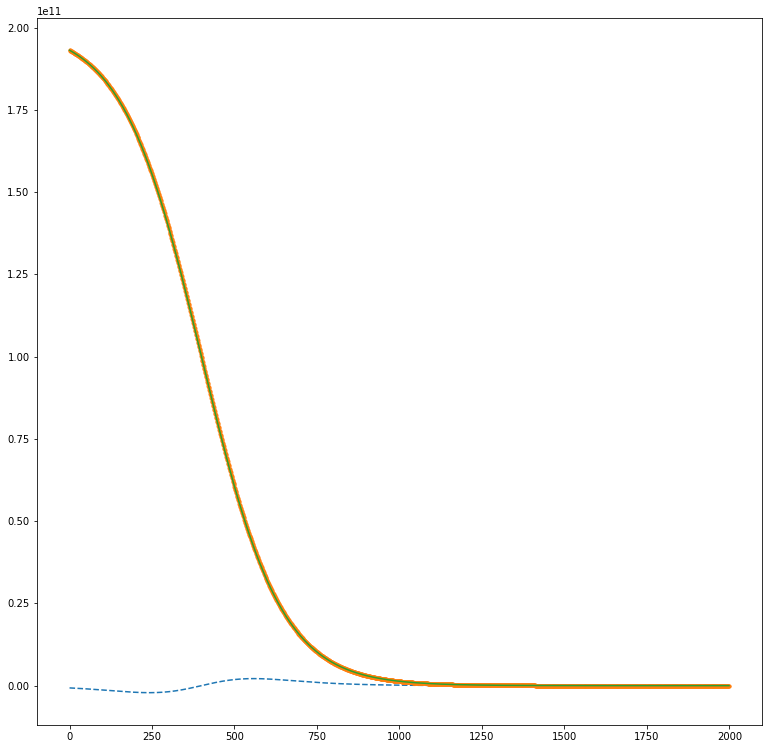

In [ ]:
plt.figure(figsize=(13,13))
plt.plot(dd_n_lista[-2],"--")

plt.plot(n_lista_spl[-2],".")
plt.plot(n_lista[-2])


In [ ]:
datos=np.loadtxt("/content/drive/MyDrive/asignaturas fisica/practica_EF/electron_density.txt",delimiter=",")

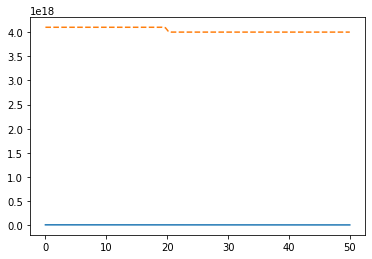

In [ ]:
min=np.amin(datos[:,1])
plt.plot(datos[:,0],datos[:,1])
plt.plot(x,y_lista[-1],"--")


#Resultados PRUEBA 2 

In [ ]:
elect=np.loadtxt("/content/drive/MyDrive/asignaturas fisica/practica_EF/electron_density.txt",delimiter=",")
hole=np.loadtxt("/content/drive/MyDrive/asignaturas fisica/practica_EF/hole_density.txt",delimiter=",")
x=np.linspace(0,50,elect.shape[0])

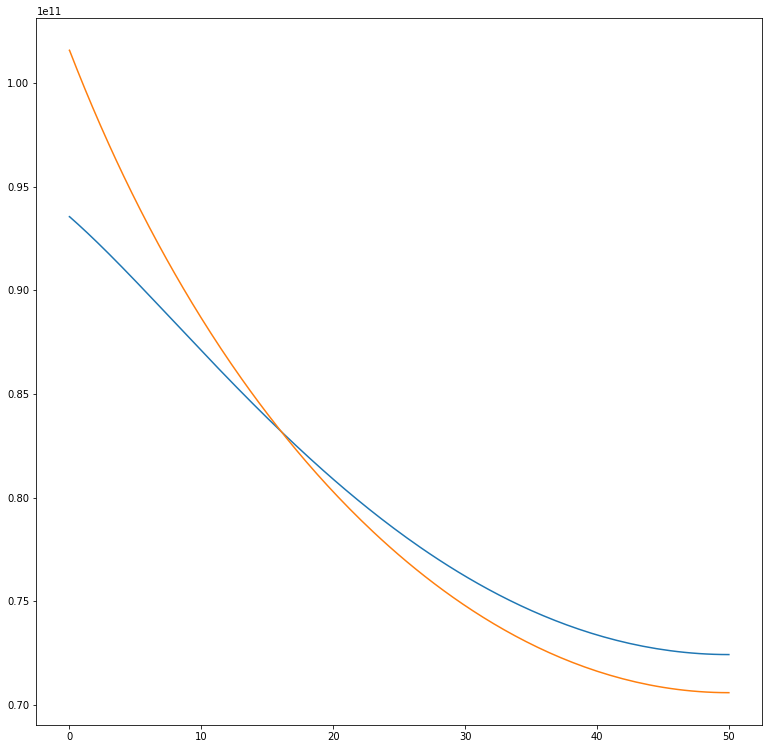

In [ ]:
plt.figure(figsize=(13,13))
plt.plot(hole[:,0],elect[:,1])
plt.plot(hole[:,0],hole[:,1])


In [ ]:
def exp_dec(A,x,Lp):
    return A*np.exp(-x/Lp)

In [ ]:
#ahora vamos a ver si se adecua bien
T=300
k= 1.380e-11 #lo ponemos en milimetros
mun=0.14#14e10
mup=0.045#4.5e10
qe=1.6e-19
Dn=T*k*mun/qe
Dp=T*k*mup/qe
taup=1e-6
taun=1e-6
Ln=np.sqrt(Dn*taun)
Lp=np.sqrt(Dp*taup)
Bn=elect[0,1]
Bp=hole[0,1]
print(Dn,Dp,Ln,Lp,Bn,Bp)

3622500000.0000005 1164375000.0 60.18720794321664 34.12293949823198 93547048615.2 101572823233.0


In [ ]:
sim_elect=exp_dec(Bn,x,Ln)
sim_hole=exp_dec(Bp,x,Lp)


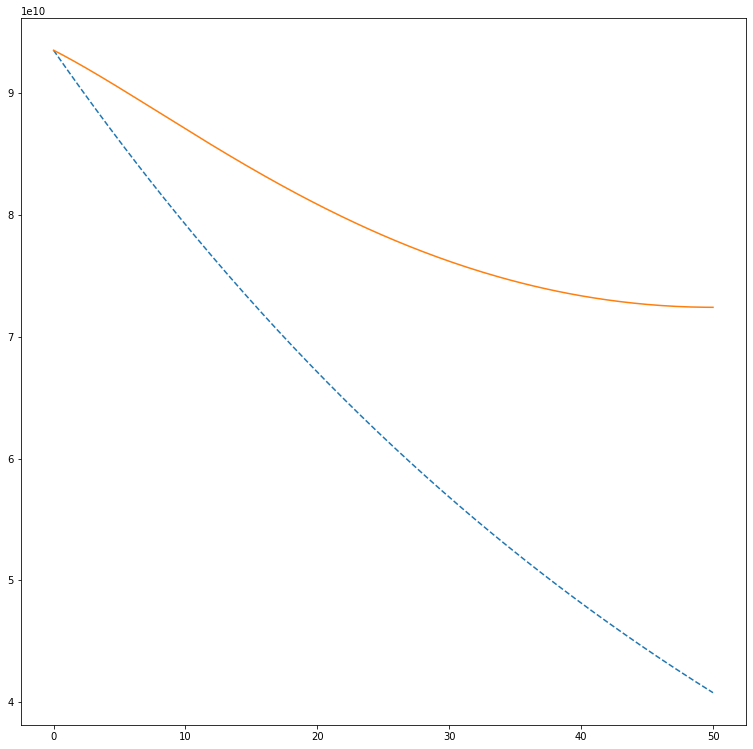

In [ ]:
plt.figure(figsize=(13,13))
plt.plot(x,sim_elect,"--")
plt.plot(hole[:,0],elect[:,1])

#plt.plot(x,sim_hole)


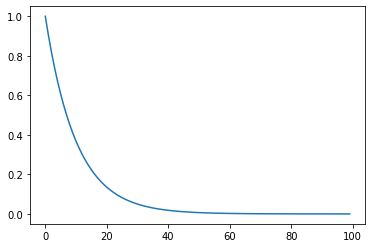

In [ ]:
plt.plot(np.arange(100),exp_dec(1,np.arange(100),10))

# Pruebas corriente difusion, RESULTADOS DEFINITIVO

In [59]:
def smoothstep(x,T,e,G):
    #T como de pronunciada es la curva
    #e donde pasa el salto,
    #G como de alto es el step
    
    aux=G/(1+np.exp((x-e)/T))
    return aux
smooth=np.vectorize(smoothstep)

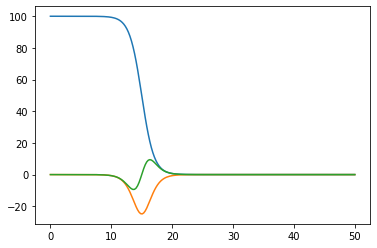

In [ ]:
#vamos a calcular la evolucion con el tiempo de un estado SIN generacion
x=np.linspace(0,50,200)
G=100
e=15
T=1
y0=smooth(x,T,e,G)
plt.plot(x,y0)
J=( np.gradient(y0) )/( np.gradient(x) )
plt.plot(x,J)
dJ=J=( np.gradient(J) )/( np.gradient(x) )
plt.plot(x,dJ)


In [ ]:
#no funciona
def funcion_calculos(x,y,G0,D,tau,dt):
    J=( np.gradient(y) )/( np.gradient(x) )
    dJ=( np.gradient(J) )/( np.gradient(x) )
    dy_aux=(G0+D*dJ -y/tau)
    new_y=y+dt*dy_aux
    return new_y #,dy_aux,dJ,J
#Lo mismo qeu arriba pero con numba 
dt=1e-8
x=np.linspace(0,50,300)
y0=np.zeros(300)#smooth(x,T,e,G)
y=[y0]
#J=[]
#dJ=[]
#dy=[]
D=3.6e3
tau=1
G=2e6
e=15
T=1
G0=smooth(x,T,e,G)
for i in range(300000):
    y_aux=funcion_calculos(x,y[-1],G0,D,tau,dt)
    y.append(y_aux)

In [ ]:
#ahora vamos a calcular dt tras dt la corriente 
dt=1e-7
x=np.linspace(0,50,160)
y0=np.zeros(160)#smooth(x,T,e,G)
y=[y0]
J=[]
dJ=[]
dy=[]
D=3.6e3
tau=1
G=2
e=15
T=0.1
G0=smooth(x,T,e,G)
for i in range(1000000):
    J.append(( np.gradient(y[-1]) )/( np.gradient(x) ))
    dJ.append(( np.gradient(J[-1]) )/( np.gradient(x) ))

    #ahora podemos calcular el nuevo valor de y
    #tenemos el temino meramente de difusion y el de generacion recombinacion tbn

    #solo con el de difucion sería
    #y_aux=y[-1]+dt*D*dJ[-1]
    #y.append(y_aux)

    #con difusion y término de recombinacion seria
    dy_aux=(G0+D*dJ[-1] -y[-1]/tau)
    dy.append(dy_aux)
    y_aux=y[-1]+dt*dy_aux
    y.append(y_aux)

In [ ]:
#sin apend
#ahora vamos a calcular dt tras dt la corriente 
dt_0=1e-6
dt=dt_0
x=np.linspace(0,50,130)
grad_x=np.gradient(x)
y0=np.zeros(130)#smooth(x,T,e,G)
y=[y0]
D=35.7e2
tau=1
G=2
e=15
T=1
G0=smooth(x,T,e,G)
for i in range(12*round(tau/dt_0)):
    if i==1e6:
        dt=1e-5
    elif i==2.5e6:
        dt=5e-5
    elif i==3.5e6:
        dt=8e-5

    J=(( np.gradient(y[-1]) )/( grad_x ))
    dJ=( np.gradient(J) )/( grad_x )
    dy_aux=(G0+D*dJ -y[-1]/tau)

    y_aux=y[-1]+dt*dy_aux
    y.append(y_aux)

In [ ]:
#lo de antes pero las derivadas con la otra forma
#sin apend
#ahora vamos a calcular dt tras dt la corriente 
dt=1e-6
x=np.linspace(0,50,110)
y0=np.zeros(110)#smooth(x,T,e,G)
y=[y0]
D=35.7e2
tau=1
G=2
e=15
T=1
G0=smooth(x,T,e,G)
for i in range(2*round(tau/dt)):
    if i==1e6:
        dt=1e-5
    elif i==2.5e6:
        dt=5e-5
    elif i==3.5e6:
        dt=8e-5
    n_spl = UnivariateSpline(x,y[-1],s=0,k=3)
    n_spl_2d = n_spl.derivative(n=2)
    dJ=n_spl_2d(x)
    dy_aux=(G0+D*dJ -y[-1]/tau)
    y_aux=y[-1]+dt*dy_aux
    y.append(y_aux)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in multiply


Para ponerlo a escala tenesmos que multiplicar por $10^{12}$, asi pasamos de um$^{-3}$ a cm$^{-3}$

In [ ]:
datos=np.loadtxt("/content/drive/MyDrive/asignaturas fisica/practica_EF/electron_density_G0_2.txt",delimiter=",")

0.23693844430470898


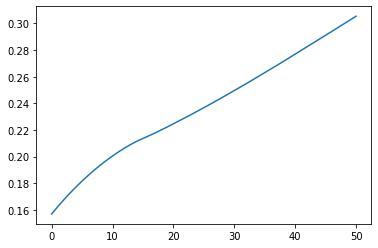

In [ ]:
y_spl = UnivariateSpline(datos[:,0],datos[:,1],s=0,k=4)
err_rel=[]
for i,j in zip(y_spl(x),y[-1]*1e12):
    err_rel.append((i-j)/i)
plt.plot(x,err_rel)
print(np.average(err_rel))

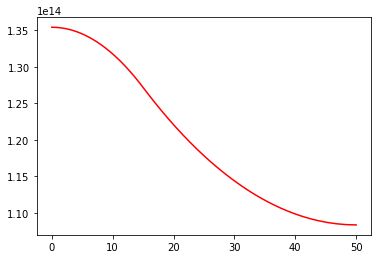

In [ ]:
plt.plot(datos[:,0],datos[:,1],"r")


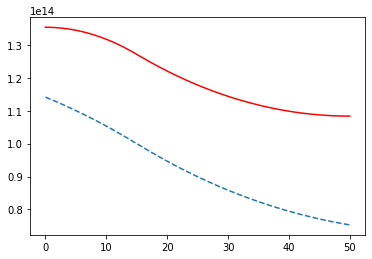

In [ ]:
plt.plot(x,y[-1]*1e12,"--")
plt.plot(datos[:,0],datos[:,1],"r")


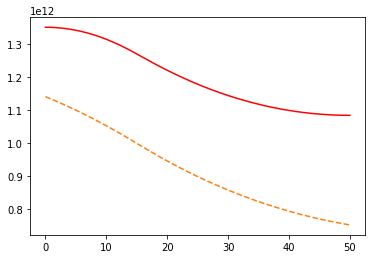

In [ ]:
plt.plot(x,y[-1]*1e12)
plt.plot(x,y[-3000000]*1e12,"--")
plt.plot(datos[:,0],datos[:,1],"r")


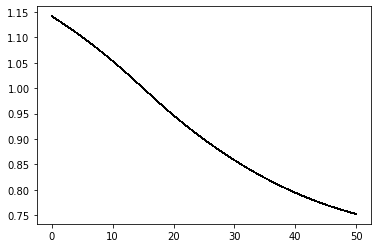

In [ ]:
for i in range(3409000,3419999):
    plt.plot(x,y[i],"k",alpha=0.01)

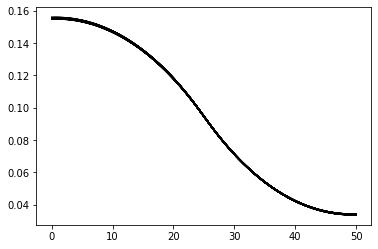

In [ ]:
#para comprobar si se va saturando
for i in range(99000,100000):
    
    plt.plot(x,y[i],"k",alpha=0.01)

#Probamos varios parametros


0.3060543961001574


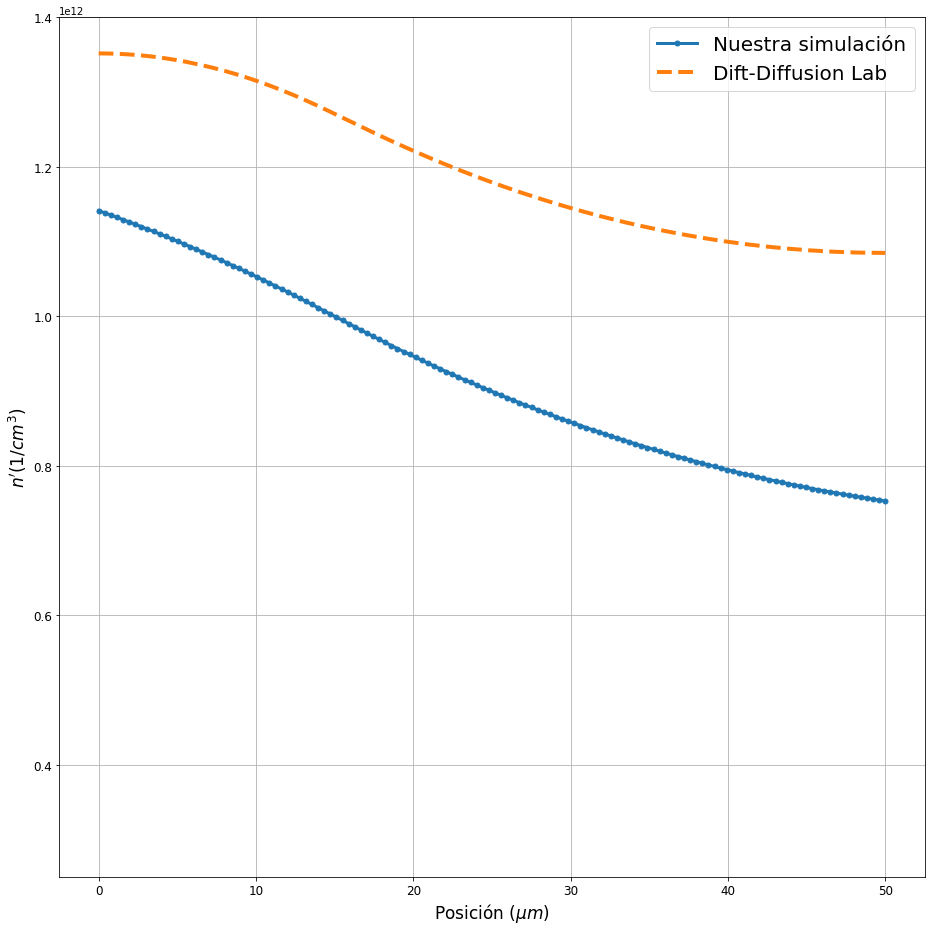

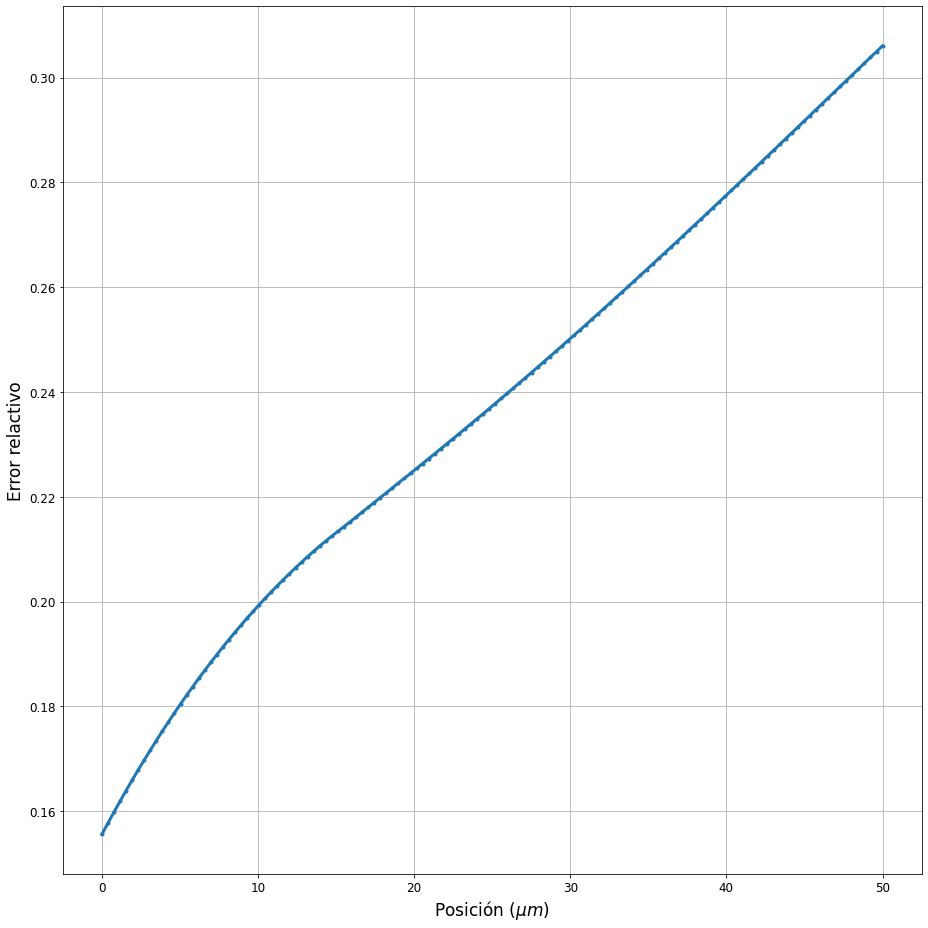

In [ ]:
y_spl = UnivariateSpline(datos[:,0],datos[:,1],s=0,k=4)
err_rel=[]
for i,j in zip(y_spl(x),y[-1]*1e12):
    err_rel.append((i-j)/i)
#lt.plot(x,err_rel)
#rint(np.average(err_rel))
plt.figure(figsize=(13,13))
plt.plot(x,y[-1]*1e12,".-",label="Nuestra simulación",linewidth=3,markersize=10)
plt.plot(datos[:,0],datos[:,1],"--",linewidth=4,label="Dift-Diffusion Lab")
plt.legend(fontsize=20)
plt.ylim([0.25e12,1.4e12])
plt.grid()

plt.xlabel("Posición ($\mu m$)",fontsize=17)
plt.ylabel("$n'  (1/cm^3 )$",fontsize=17)
plt.tight_layout()
#plt.savefig("/content/drive/MyDrive/asignaturas fisica/practica_EF/G0_2.png",dpi=200)
ax=plt.gca()
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.figure(figsize=(13,13))
plt.plot(x,err_rel,".-",linewidth=3,markersize=6)
plt.grid()
plt.xlabel("Posición ($\mu m$)",fontsize=17)
plt.ylabel("Error relactivo",fontsize=17)
ax=plt.gca()
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.tight_layout()
#plt.savefig("/content/drive/MyDrive/asignaturas fisica/practica_EF/rel_error_G0_2.png",dpi=200)
print(err_rel[-1])

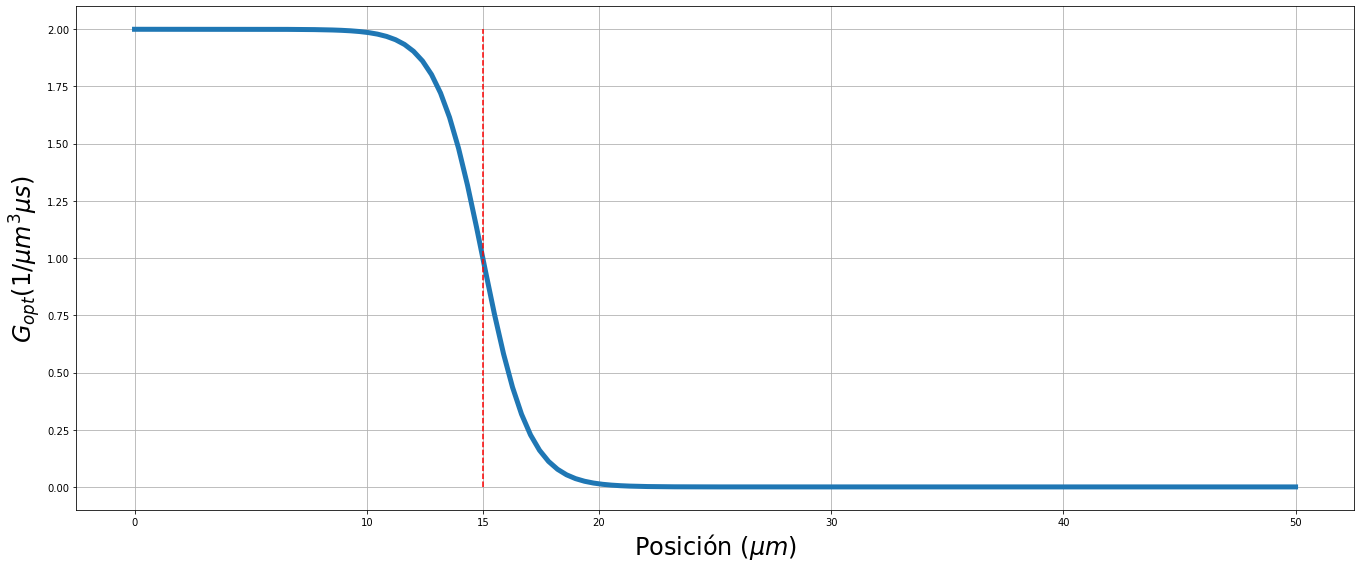

In [66]:
plt.figure(figsize=(19,8))
plt.plot(x,G0,linewidth=5)
plt.grid()
plt.plot([15,15],[0,2],"r--")
plt.xticks([0,10,15,20,30,40,50])
plt.xlabel("Posición ($\mu m$)",fontsize=24)
plt.ylabel("$G_{opt} (1/\mu m^3 \mu s)$",fontsize=24)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/asignaturas fisica/practica_EF/smooth.png",dpi=200)

#Ciclo para calcular lo que falta

In [60]:
def smoothstep(x,T,e,G):
    #T como de pronunciada es la curva
    #e donde pasa el salto,
    #G como de alto es el step
    
    aux=G/(1+np.exp((x-e)/T))
    return aux
smooth=np.vectorize(smoothstep)

In [ ]:
#sin apend
#ahora vamos a calcular dt tras dt la corriente 
def fun_aux(G,D):
    dt_0=1e-6
    dt=dt_0
    x=np.linspace(0,50,130)
    grad_x=np.gradient(x)
    y0=np.zeros(130)#smooth(x,T,e,G)
    y=[y0]
    #D=35.7e2
    tau=1
    #G=2
    e=15
    T=1
    G0=smooth(x,T,e,G)
    for i in range(8*round(tau/dt_0)):
        if i==1e6:
            dt=1e-5
        elif i==2.5e6:
            dt=5e-5
        elif i==3.5e6:
            dt=8e-5
        J=(( np.gradient(y[-1]) )/( grad_x ))
        dJ=( np.gradient(J) )/( grad_x )
        dy_aux=(G0+D*dJ -y[-1]/tau)

        y_aux=y[-1]+dt*dy_aux
        y.append(y_aux)
    return y

In [ ]:
save_dir="/content/drive/MyDrive/asignaturas fisica/practica_EF/"

for G in [2,200,20000]:
    for D in [35.7e2,13e2]:
        print(G,D)
        y=fun_aux(G,D)
        np.save(f"{save_dir}G_{str(G)}_D_{str(D)}.npy",y[-80000:])
        del y

2 3570.0
2 1300.0
200 3570.0
200 1300.0
20000 3570.0
20000 1300.0


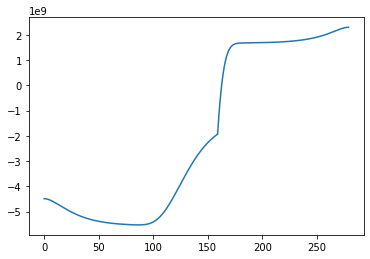

In [12]:
plt.plot((datos_e[:,1]-datos_h[:,1]))

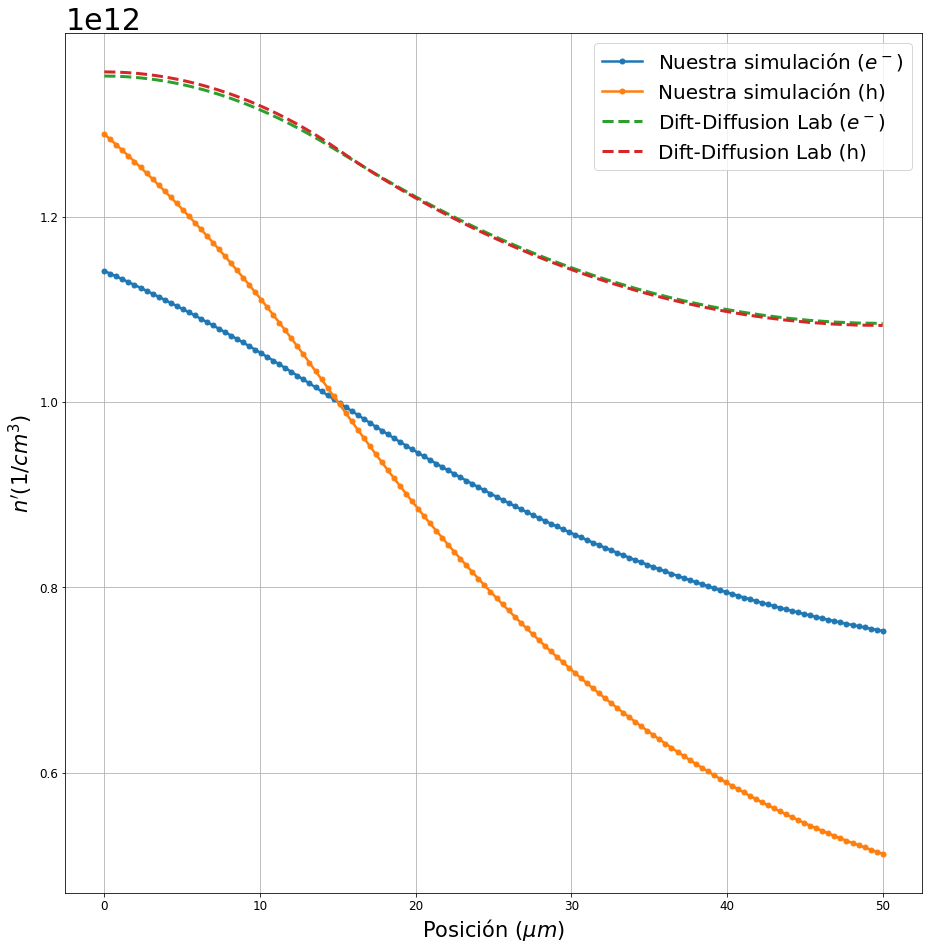

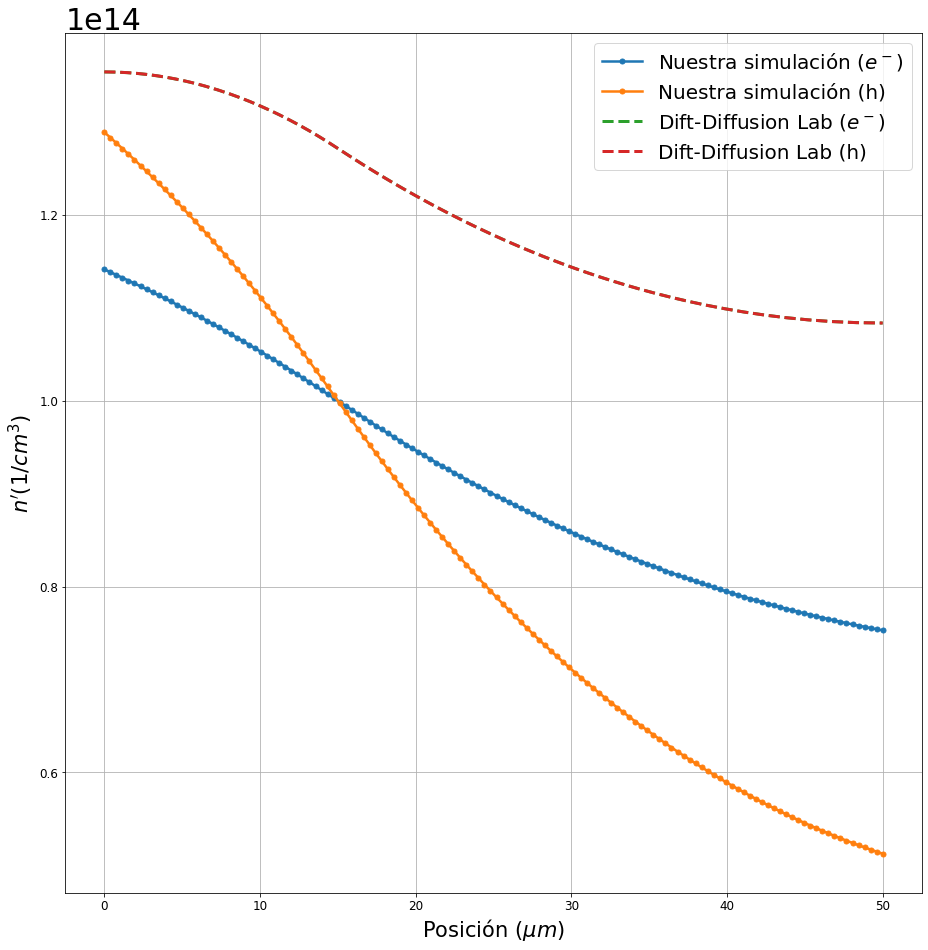

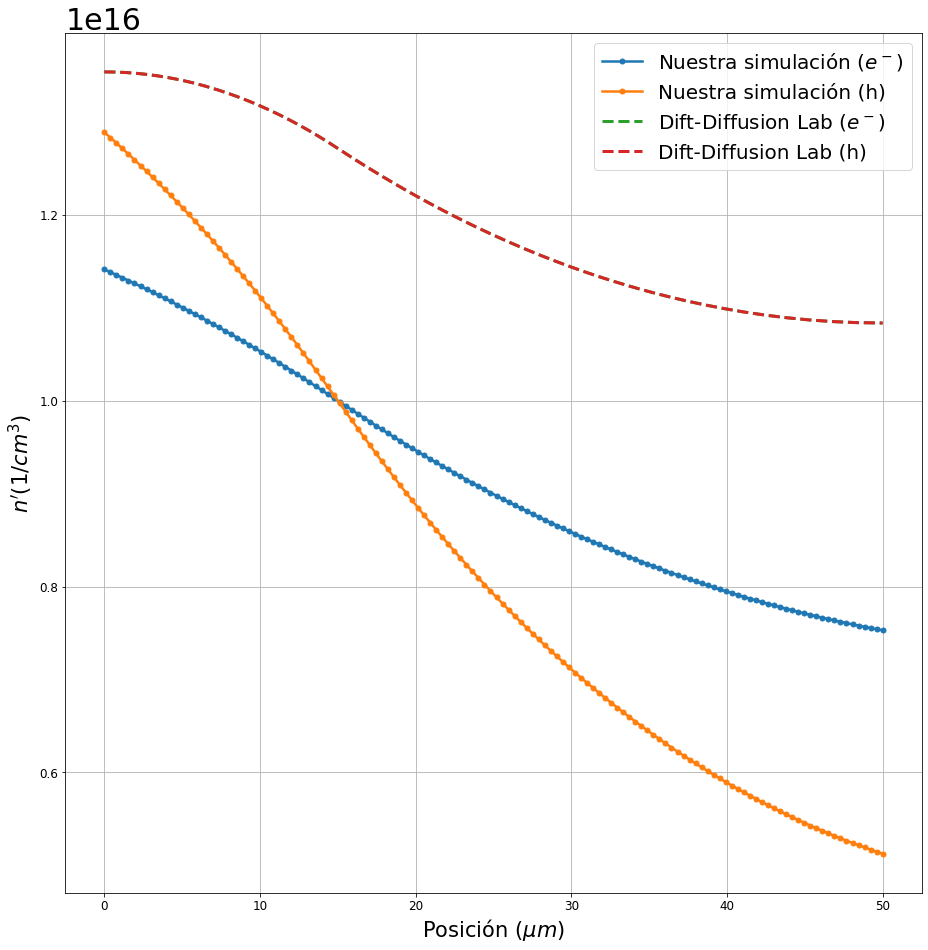

In [18]:
x=np.linspace(0,50,130)
for k in [2,200,20000]:
    datos_e=np.loadtxt(f"/content/drive/MyDrive/asignaturas fisica/practica_EF/electron_density_G0_{k}.txt",delimiter=",")
    datos_h=np.loadtxt(f"/content/drive/MyDrive/asignaturas fisica/practica_EF/hole_density_G0_{k}.txt",delimiter=",")
    simulacion_e=np.load(f"/content/drive/MyDrive/asignaturas fisica/practica_EF/G_{k}_D_3570.0.npy")
    simulacion_h=np.load(f"/content/drive/MyDrive/asignaturas fisica/practica_EF/G_{k}_D_1300.0.npy")

    y_spl_e = UnivariateSpline(datos_e[:,0],datos_e[:,1],s=0,k=4)
    y_spl_h = UnivariateSpline(datos_h[:,0],datos_h[:,1],s=0,k=4)

    plt.figure(figsize=(13,13.3))
    plt.plot(x,simulacion_e[-1]*1e12,".-",label="Nuestra simulación ($e^-$)",linewidth=2.5,markersize=10)
    plt.plot(x,simulacion_h[-1]*1e12,".-",label="Nuestra simulación (h)",linewidth=2.5,markersize=10)

    plt.plot(datos_e[:,0],datos_e[:,1],"--",linewidth=3,label="Dift-Diffusion Lab ($e^-$)")
    plt.plot(datos_h[:,0],datos_h[:,1],"--",linewidth=3,label="Dift-Diffusion Lab (h)")

    plt.legend(fontsize=20)
    plt.grid()

    plt.xlabel("Posición ($\mu m$)",fontsize=21)
    plt.ylabel("$n'  (1/cm^3 )$",fontsize=21)
    plt.tight_layout()
    ax=plt.gca()

    text = ax.yaxis.get_offset_text()
    # Set the size.
    text.set_size(30) # Overkill!

    ax.xaxis.set_tick_params(labelsize=12)
    ax.yaxis.set_tick_params(labelsize=12)
    plt.tight_layout()
    plt.savefig(f"/content/drive/MyDrive/asignaturas fisica/practica_EF/G0_{k}_e_h.png",dpi=200)



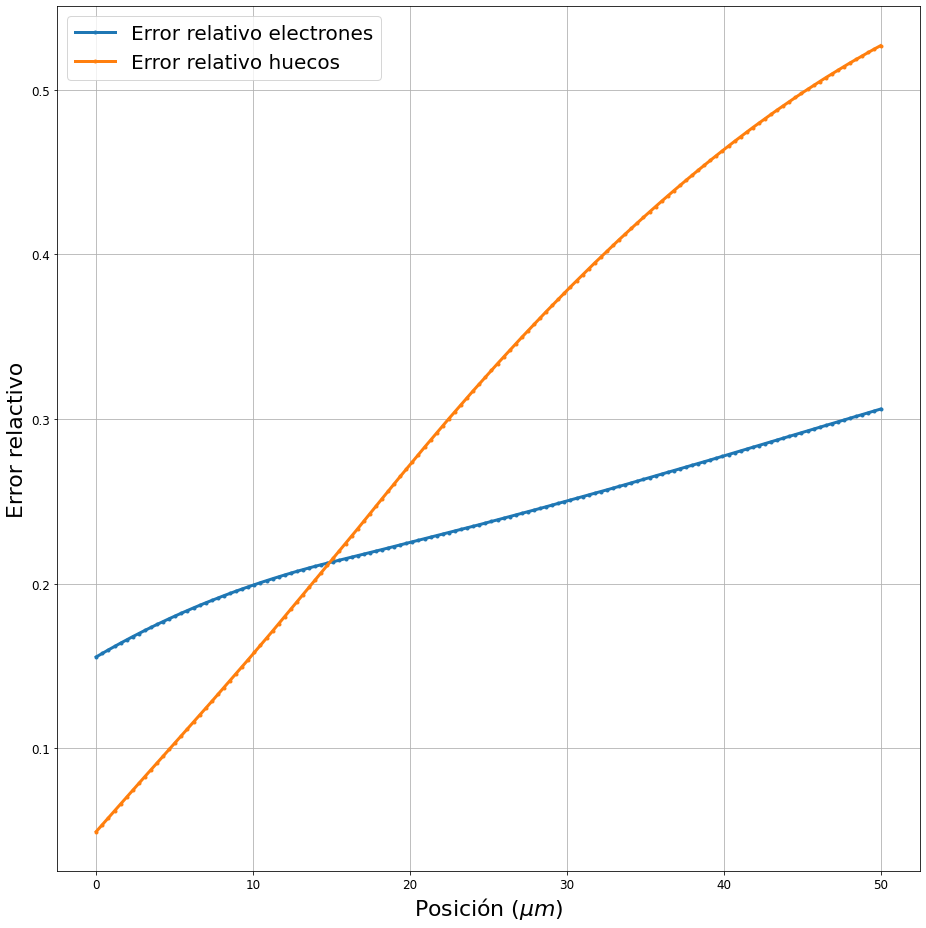

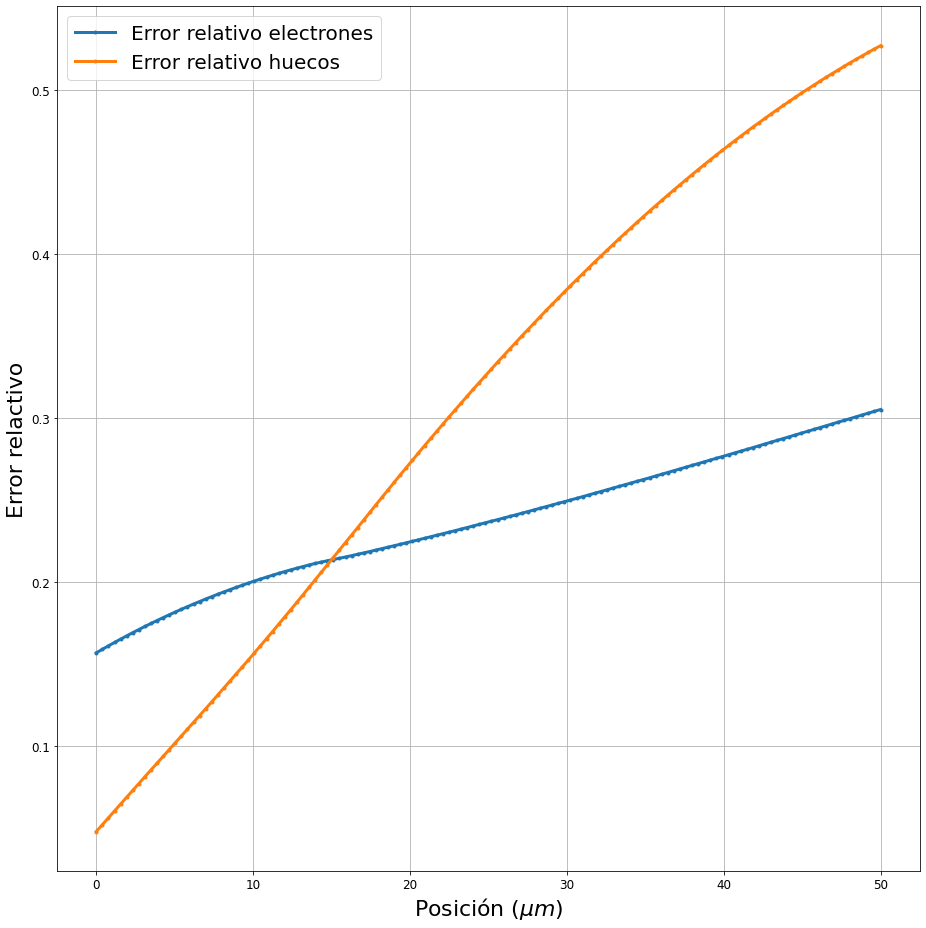

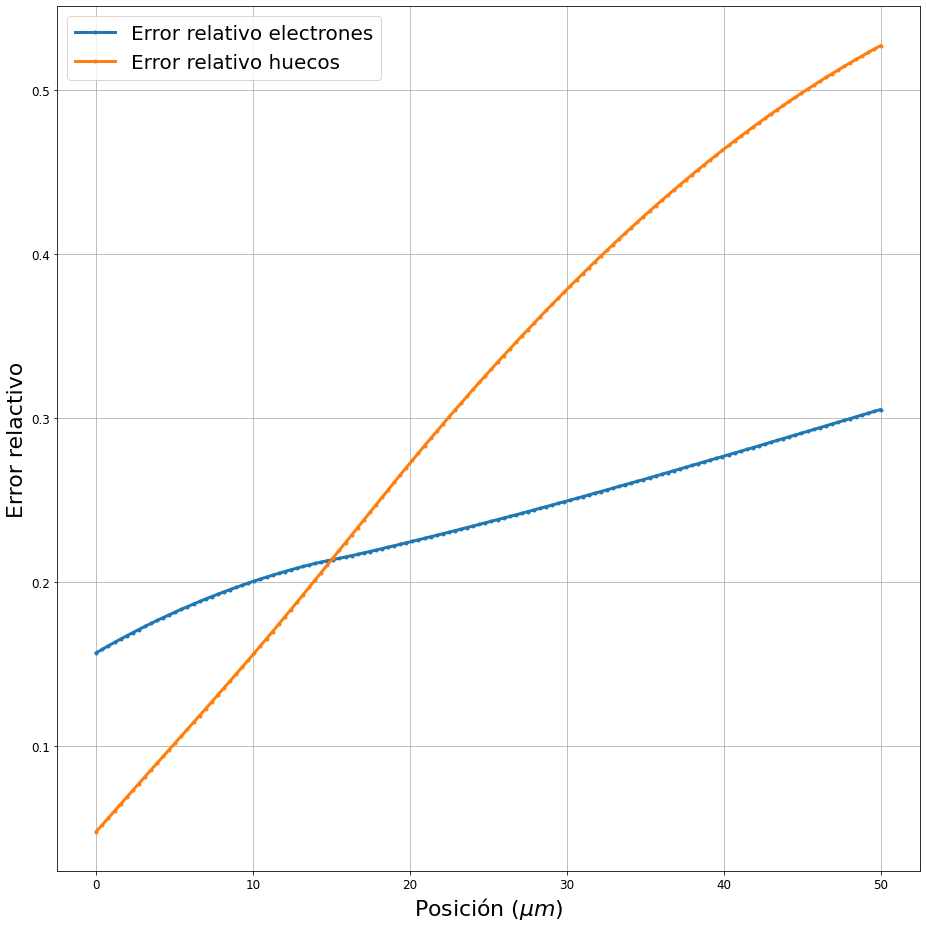

In [21]:
x=np.linspace(0,50,130)
for k in [2,200,20000]:
    datos_e=np.loadtxt(f"/content/drive/MyDrive/asignaturas fisica/practica_EF/electron_density_G0_{k}.txt",delimiter=",")
    datos_h=np.loadtxt(f"/content/drive/MyDrive/asignaturas fisica/practica_EF/hole_density_G0_{k}.txt",delimiter=",")
    simulacion_e=np.load(f"/content/drive/MyDrive/asignaturas fisica/practica_EF/G_{k}_D_3570.0.npy")
    simulacion_h=np.load(f"/content/drive/MyDrive/asignaturas fisica/practica_EF/G_{k}_D_1300.0.npy")

    y_spl_e = UnivariateSpline(datos_e[:,0],datos_e[:,1],s=0,k=4)
    y_spl_h = UnivariateSpline(datos_h[:,0],datos_h[:,1],s=0,k=4)

    err_rel_e=[]
    for i,j in zip(y_spl_e(x),simulacion_e[-1]*1e12):
        err_rel_e.append((i-j)/i)

    err_rel_h=[]
    for i,j in zip(y_spl_h(x),simulacion_h[-1]*1e12):
        err_rel_h.append((i-j)/i)


    plt.figure(figsize=(13,13))
    plt.plot(x,err_rel_e,".-",linewidth=3,markersize=6,label="Error relativo electrones")
    plt.plot(x,err_rel_h,".-",linewidth=3,markersize=6,label="Error relativo huecos")
    plt.grid()
    plt.xlabel("Posición ($\mu m$)",fontsize=22)
    plt.ylabel("Error relactivo",fontsize=22)
    ax=plt.gca()
    ax.xaxis.set_tick_params(labelsize=13)
    ax.yaxis.set_tick_params(labelsize=13)
    plt.legend(fontsize=20)
    plt.tight_layout()
    ax=plt.gca()

    text = ax.yaxis.get_offset_text()
    # Set the size.
    text.set_size(30) # Overkill!

    ax.xaxis.set_tick_params(labelsize=12)
    ax.yaxis.set_tick_params(labelsize=12)
    #plt.savefig(f"/content/drive/MyDrive/asignaturas fisica/practica_EF/err_rel_G0_{k}_e_h.png",dpi=200)



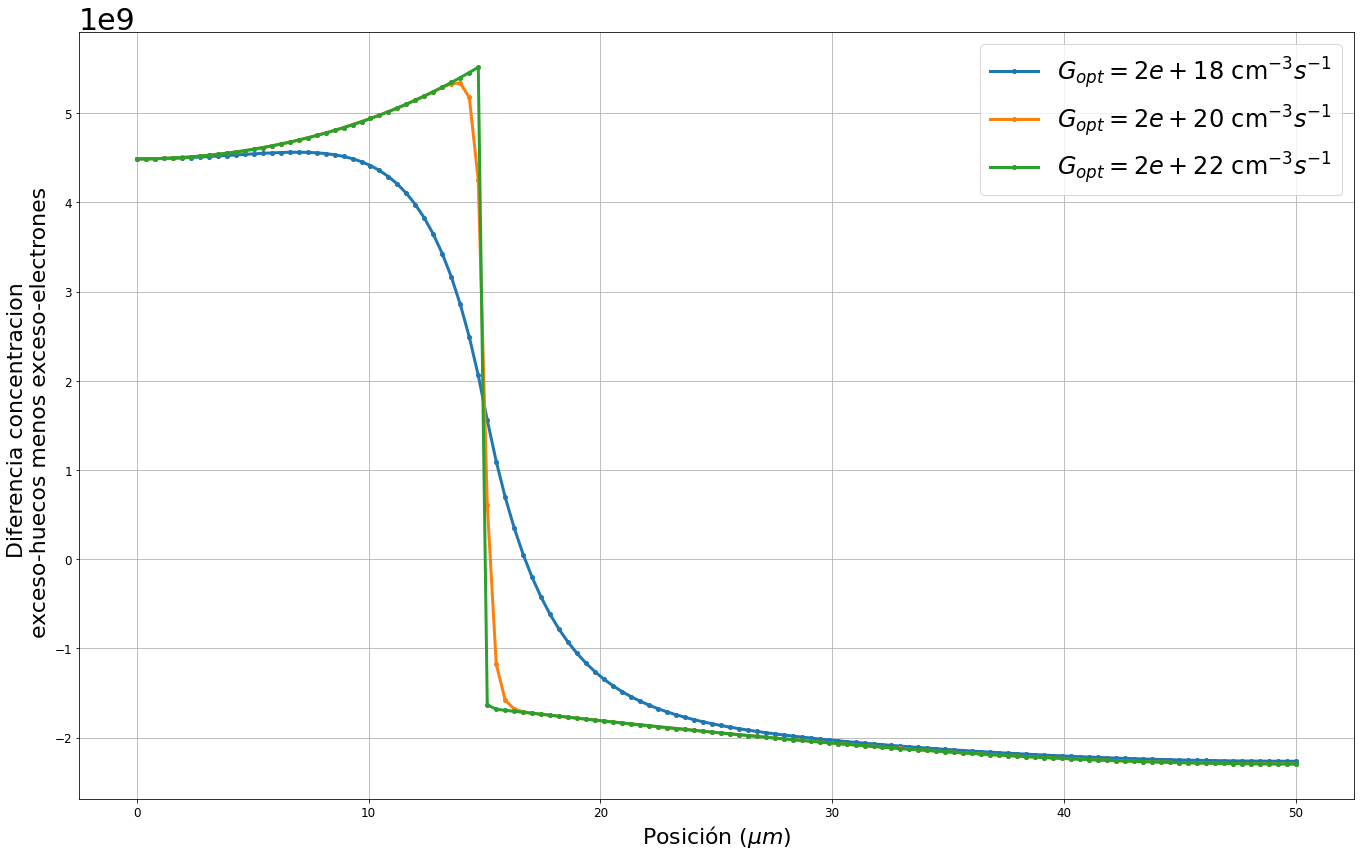

In [57]:
plt.figure(figsize=(19,12))

x=np.linspace(0,50,130)
for k in [2,200,20000]:
    datos_e=np.loadtxt(f"/content/drive/MyDrive/asignaturas fisica/practica_EF/electron_density_G0_{k}.txt",delimiter=",")
    datos_h=np.loadtxt(f"/content/drive/MyDrive/asignaturas fisica/practica_EF/hole_density_G0_{k}.txt",delimiter=",")

    y_spl_e = UnivariateSpline(datos_e[:,0],datos_e[:,1],s=0,k=4)
    y_spl_h = UnivariateSpline(datos_h[:,0],datos_h[:,1],s=0,k=4)

    aux=[]
    for i,j in zip(y_spl_e(x),y_spl_h(x)):
        aux.append(j-i)



    plt.plot(x,aux,".-",linewidth=3,markersize=8,label=f"$G_{{opt}}={(2e18*k/2)}$ cm$^{{-3}}s^{{-1}}$")
    plt.grid()
    plt.xlabel("Posición ($\mu m$)",fontsize=22)
    plt.ylabel("Diferencia concentracion \n exceso-huecos menos exceso-electrones",fontsize=22)
    ax=plt.gca()
    ax.xaxis.set_tick_params(labelsize=13)
    ax.yaxis.set_tick_params(labelsize=13)
    ax=plt.gca()
    plt.legend(fontsize=24)
    text = ax.yaxis.get_offset_text()
    # Set the size.
    text.set_size(30) # Overkill!

    ax.xaxis.set_tick_params(labelsize=12)
    ax.yaxis.set_tick_params(labelsize=12)
    plt.tight_layout()

    plt.savefig(f"/content/drive/MyDrive/asignaturas fisica/practica_EF/diferencia_e_h_ddl.png",dpi=200)


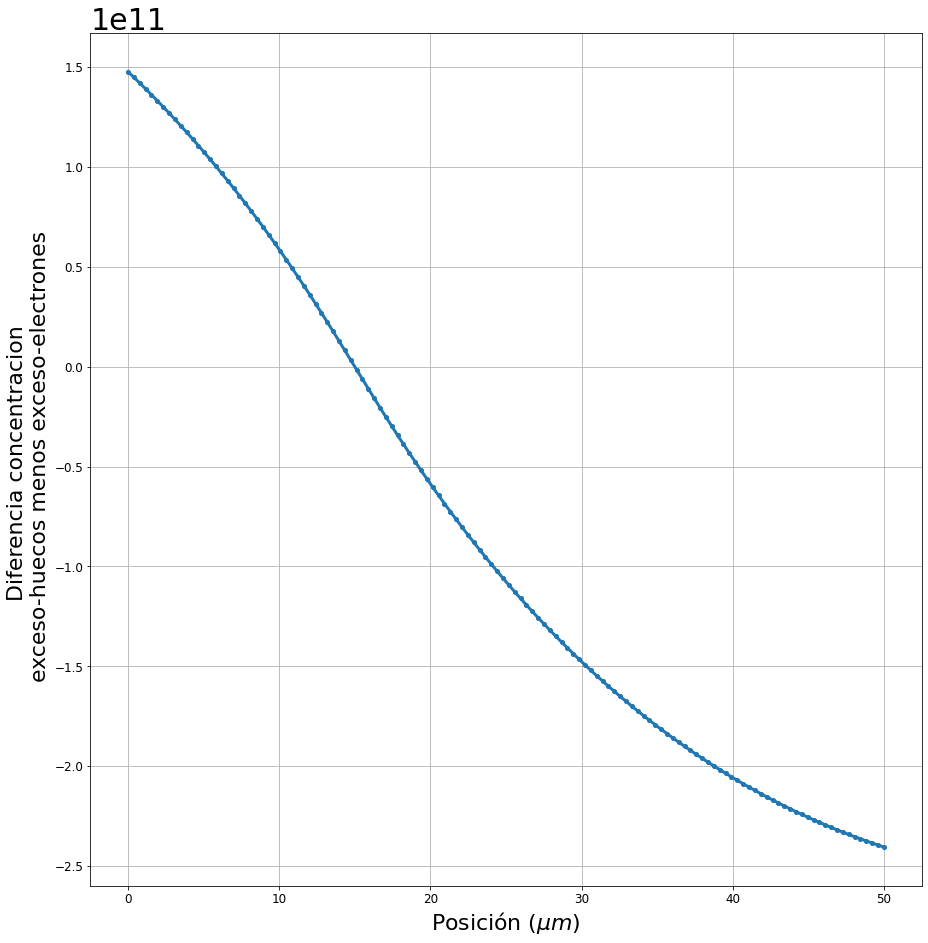

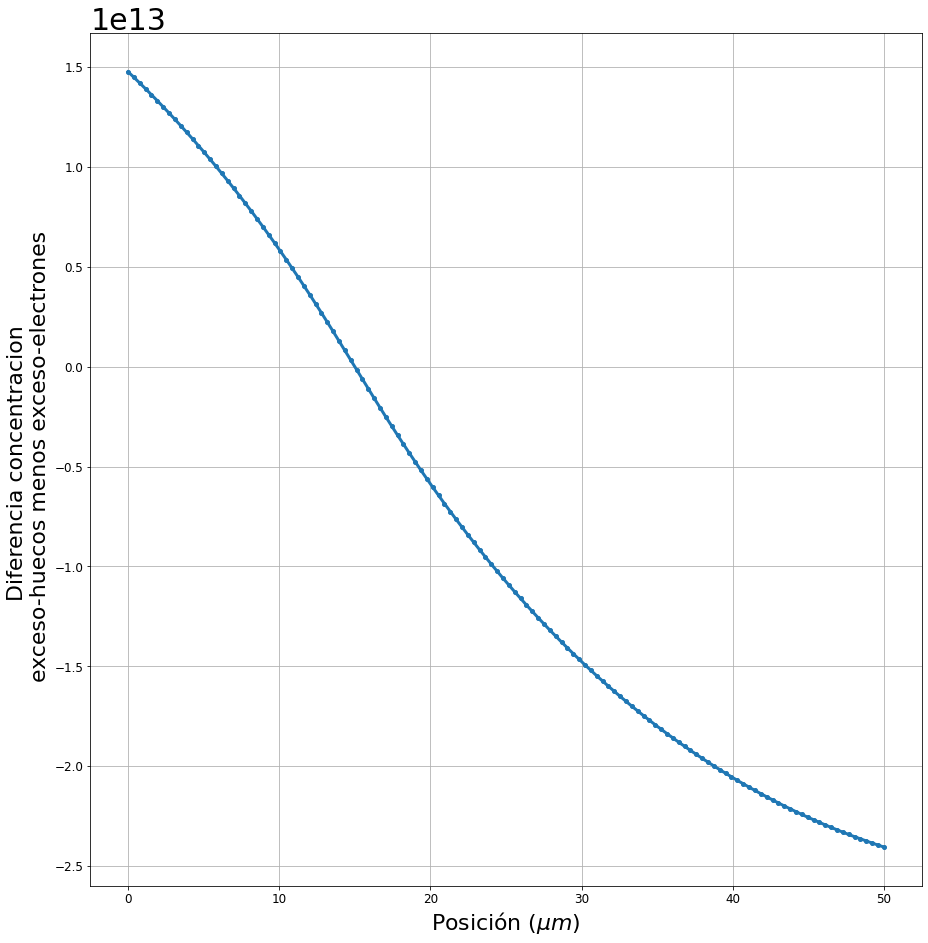

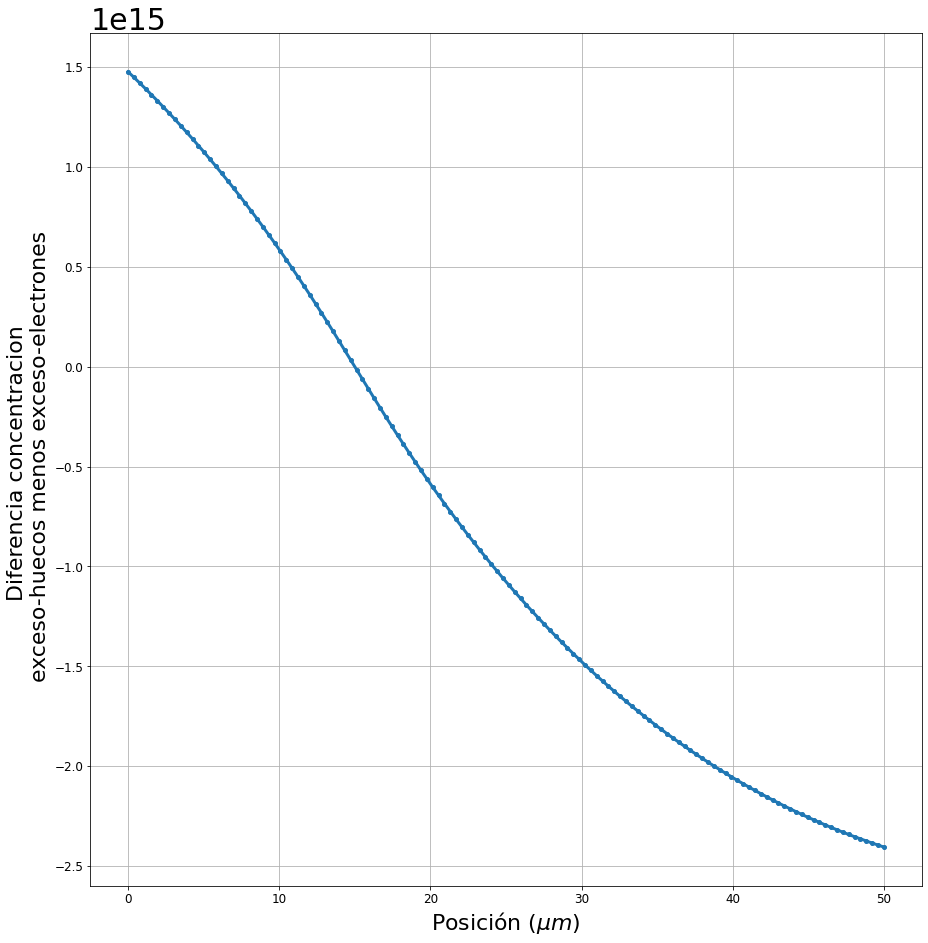

In [42]:

x=np.linspace(0,50,130)
for k in [2,200,20000]:
    simulacion_e=np.load(f"/content/drive/MyDrive/asignaturas fisica/practica_EF/G_{k}_D_3570.0.npy")
    simulacion_h=np.load(f"/content/drive/MyDrive/asignaturas fisica/practica_EF/G_{k}_D_1300.0.npy")


    aux=[]
    for i,j in zip(simulacion_e[-1]*1e12,simulacion_h[-1]*1e12):
        aux.append(j-i)


    plt.figure(figsize=(13,13.2))

    plt.plot(x,aux,".-",linewidth=3,markersize=8)
    plt.grid()
    plt.xlabel("Posición ($\mu m$)",fontsize=22)
    ax=plt.gca()
    ax.xaxis.set_tick_params(labelsize=13)
    ax.yaxis.set_tick_params(labelsize=13)
    ax=plt.gca()
    plt.ylabel("Diferencia concentracion \n exceso-huecos menos exceso-electrones",fontsize=22)

    text = ax.yaxis.get_offset_text()
    # Set the size.
    text.set_size(30) # Overkill!

    ax.xaxis.set_tick_params(labelsize=12)
    ax.yaxis.set_tick_params(labelsize=12)
    plt.tight_layout()

    plt.savefig(f"/content/drive/MyDrive/asignaturas fisica/practica_EF/diferencia_e_h_G_{k}_oursimulation.png",dpi=200)



#Representaciones Cuansiniveles de fermi

In [91]:
Ec=np.loadtxt("/content/drive/MyDrive/asignaturas fisica/practica_EF/posicion_eq_EC.txt",delimiter=",")
Ev=np.loadtxt("/content/drive/MyDrive/asignaturas fisica/practica_EF/posicion_eq_EV.txt",delimiter=",")
Ei=np.loadtxt("/content/drive/MyDrive/asignaturas fisica/practica_EF/posicion_eq_Ei.txt",delimiter=",")

In [76]:
#Ec[:,1]=Ec[:,1]+abs(Ev[:,1])
#Ei[:,1]=Ei[:,1]+abs(Ev[:,1])
#Ev[:,1]=Ev[:,1]+abs(Ev[:,1])

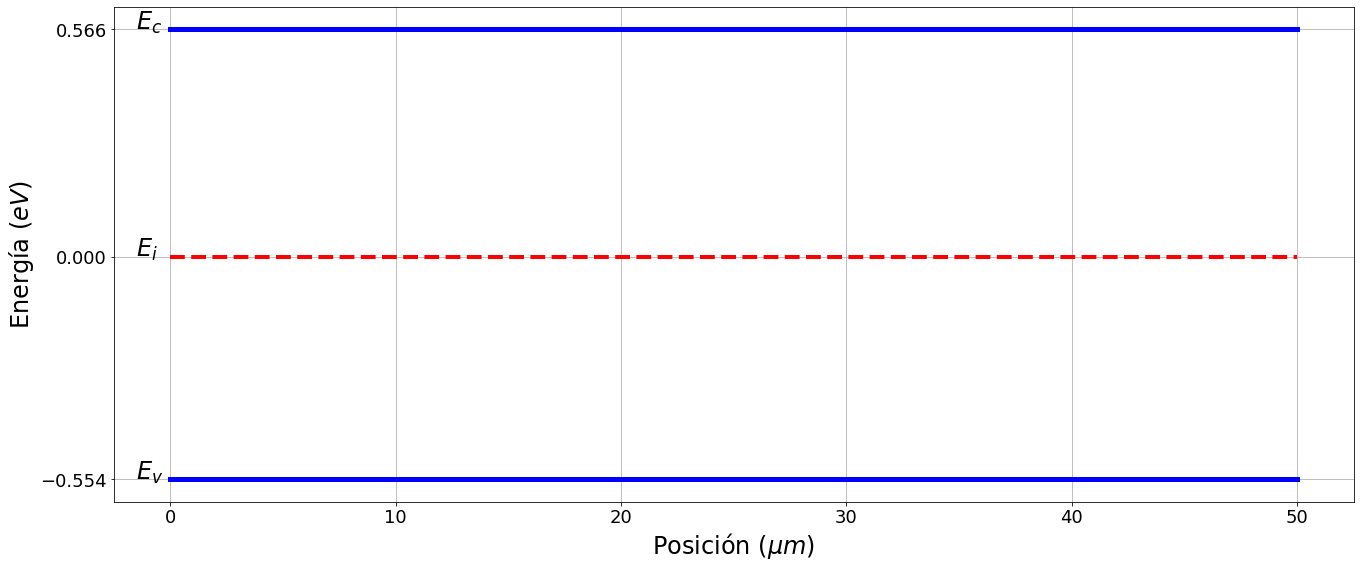

In [92]:
plt.figure(figsize=(19,8))
plt.plot(Ec[:,0],Ec[:,1],"b",linewidth=5)
plt.plot(Ev[:,0],Ev[:,1],"b",linewidth=5)
plt.plot(Ei[:,0],Ei[:,1],"r--",linewidth=4)
plt.grid()
plt.yticks([Ev[0,1],Ei[0,1],Ec[0,1]])
plt.xlabel("Posición ($\mu m$)",fontsize=24)
plt.ylabel("Energía ($eV$)",fontsize=24)
plt.text(-1.5,Ev[0,1],"$E_v$",fontsize=24)
plt.text(-1.5,Ec[0,1],"$E_c$",fontsize=24)
plt.text(-1.5,Ei[0,1],"$E_i$",fontsize=24)
ax=plt.gca()
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
plt.tight_layout()

plt.savefig(f"/content/drive/MyDrive/asignaturas fisica/practica_EF/niveles_energia_equilibrio",dpi=200)



In [86]:
Ec_2=np.loadtxt("/content/drive/MyDrive/asignaturas fisica/practica_EF/G2_energia/posicion_eq_EC_G_2.txt",delimiter=",")
Ev_2=np.loadtxt("/content/drive/MyDrive/asignaturas fisica/practica_EF/G2_energia/posicion_eq_EV_G_2.txt",delimiter=",")
Ei_2=np.loadtxt("/content/drive/MyDrive/asignaturas fisica/practica_EF/G2_energia/posicion_eq_Ei_G_2.txt",delimiter=",")
En_2=np.loadtxt("/content/drive/MyDrive/asignaturas fisica/practica_EF/G2_energia/posicion_eq_Ein_G_2.txt",delimiter=",")
Ep_2=np.loadtxt("/content/drive/MyDrive/asignaturas fisica/practica_EF/G2_energia/posicion_eq_Eip_G_2.txt",delimiter=",")

In [85]:
Ec_200=np.loadtxt("/content/drive/MyDrive/asignaturas fisica/practica_EF/G200_energia/posicion_eq_EC_G_200.txt",delimiter=",")
Ev_200=np.loadtxt("/content/drive/MyDrive/asignaturas fisica/practica_EF/G200_energia/posicion_eq_EV_G_200.txt",delimiter=",")
Ei_200=np.loadtxt("/content/drive/MyDrive/asignaturas fisica/practica_EF/G200_energia/posicion_eq_Ei_G_200.txt",delimiter=",")
En_200=np.loadtxt("/content/drive/MyDrive/asignaturas fisica/practica_EF/G200_energia/posicion_eq_Ein_G_200.txt",delimiter=",")
Ep_200=np.loadtxt("/content/drive/MyDrive/asignaturas fisica/practica_EF/G200_energia/posicion_eq_Eip_G_200.txt",delimiter=",")

In [84]:
Ec_20000=np.loadtxt("/content/drive/MyDrive/asignaturas fisica/practica_EF/G20000_energia/posicion_eq_EC_G_20000.txt",delimiter=",")
Ev_20000=np.loadtxt("/content/drive/MyDrive/asignaturas fisica/practica_EF/G20000_energia/posicion_eq_EV_G_20000.txt",delimiter=",")
Ei_20000=np.loadtxt("/content/drive/MyDrive/asignaturas fisica/practica_EF/G20000_energia/posicion_eq_Ei_G_20000.txt",delimiter=",")
En_20000=np.loadtxt("/content/drive/MyDrive/asignaturas fisica/practica_EF/G20000_energia/posicion_eq_Ein_G_20000.txt",delimiter=",")
Ep_20000=np.loadtxt("/content/drive/MyDrive/asignaturas fisica/practica_EF/G20000_energia/posicion_eq_Eip_G_20000.txt",delimiter=",")

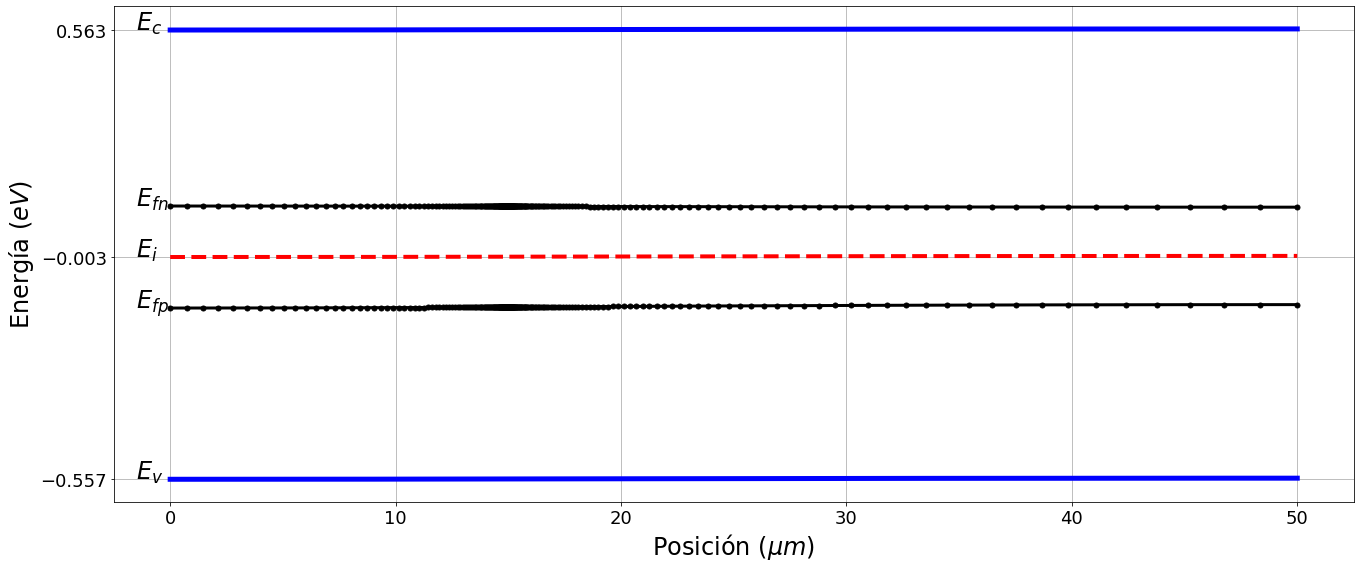

In [149]:



plt.figure(figsize=(19,8))
plt.plot(Ec_2[:,0],Ec_2[:,1],"b",linewidth=5)
plt.plot(Ev_2[:,0],Ev_2[:,1],"b",linewidth=5)
plt.plot(Ei_2[:,0],Ei_2[:,1],"r--",linewidth=4)

plt.plot(En_2[:,0],En_2[:,1],"k.-",linewidth=3,markersize=10)
plt.plot(Ep_2[:,0],Ep_2[:,1],"k.-",linewidth=3,markersize=10)
plt.grid()
plt.yticks([Ev_2[0,1],Ei_2[0,1],Ec_2[0,1]])
plt.xlabel("Posición ($\mu m$)",fontsize=24)
plt.ylabel("Energía ($eV$)",fontsize=24)
plt.text(-1.5,Ev_2[0,1],"$E_v$",fontsize=24)
plt.text(-1.5,Ec_2[0,1],"$E_c$",fontsize=24)
plt.text(-1.5,Ei_2[0,1],"$E_i$",fontsize=24)
plt.text(-1.5,En_2[0,1],"$E_{fn}$",fontsize=24)
plt.text(-1.5,Ep_2[0,1],"$E_{fp}$",fontsize=24)
ax=plt.gca()
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
plt.tight_layout()

plt.savefig(f"/content/drive/MyDrive/asignaturas fisica/practica_EF/niveles_energia_fuera_equilibrio_G2.png",dpi=200)



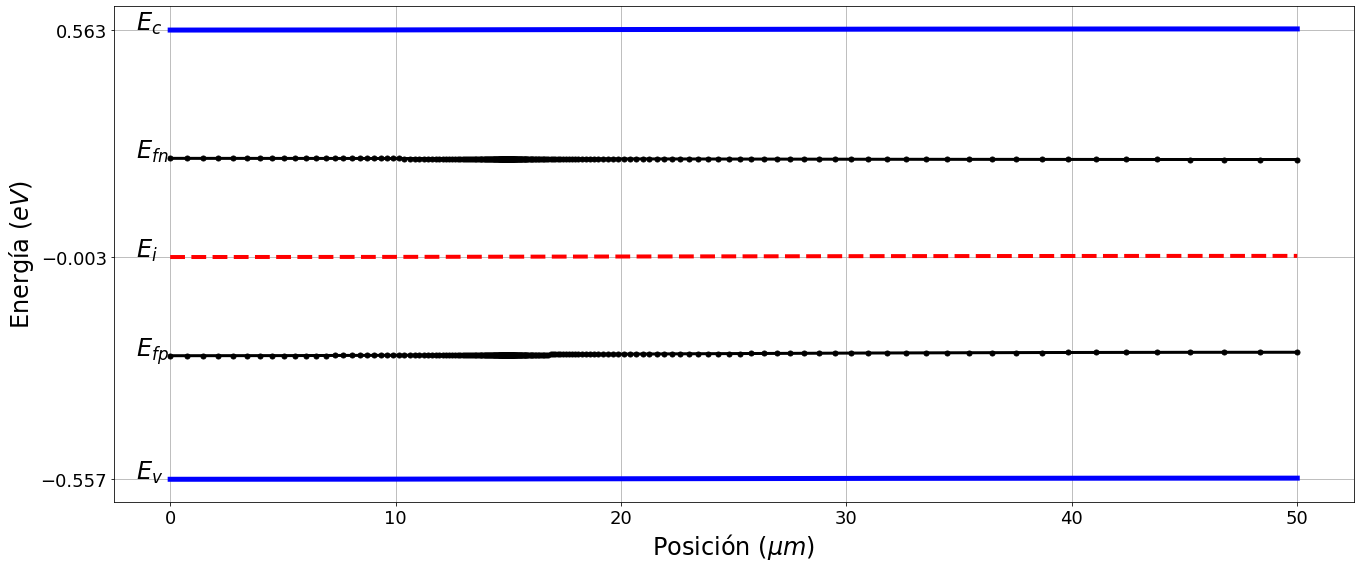

In [147]:



plt.figure(figsize=(19,8))
plt.plot(Ec_200[:,0],Ec_200[:,1],"b",linewidth=5)
plt.plot(Ev_200[:,0],Ev_200[:,1],"b",linewidth=5)
plt.plot(Ei_200[:,0],Ei_200[:,1],"r--",linewidth=4)

plt.plot(En_200[:,0],En_200[:,1],"k.-",linewidth=3,markersize=10)
plt.plot(Ep_200[:,0],Ep_200[:,1],"k.-",linewidth=3,markersize=10)
plt.grid()
plt.yticks([Ev_200[0,1],Ei_200[0,1],Ec_200[0,1]])
plt.xlabel("Posición ($\mu m$)",fontsize=24)
plt.ylabel("Energía ($eV$)",fontsize=24)
plt.text(-1.5,Ev_200[0,1],"$E_v$",fontsize=24)
plt.text(-1.5,Ec_200[0,1],"$E_c$",fontsize=24)
plt.text(-1.5,Ei_200[0,1],"$E_i$",fontsize=24)
plt.text(-1.5,En_200[0,1],"$E_{fn}$",fontsize=24)
plt.text(-1.5,Ep_200[0,1],"$E_{fp}$",fontsize=24)
ax=plt.gca()
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
plt.tight_layout()

plt.savefig(f"/content/drive/MyDrive/asignaturas fisica/practica_EF/niveles_energia_fuera_equilibrio_G200.png",dpi=200)



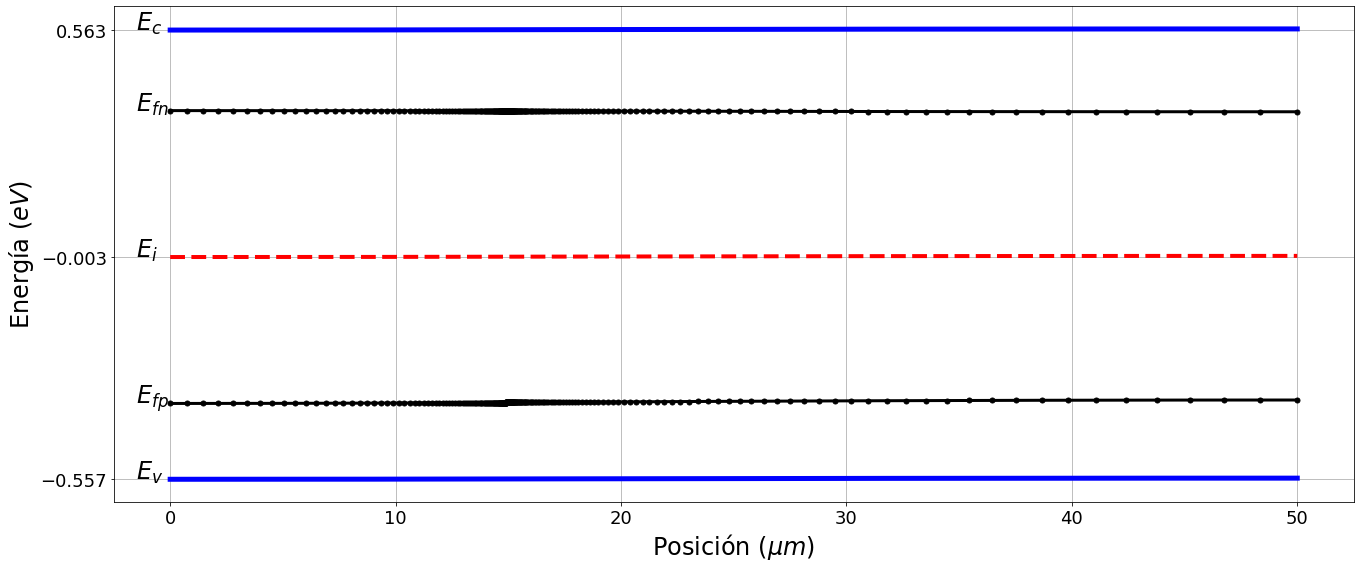

In [148]:



plt.figure(figsize=(19,8))
plt.plot(Ec_20000[:,0],Ec_20000[:,1],"b",linewidth=5)
plt.plot(Ev_20000[:,0],Ev_20000[:,1],"b",linewidth=5)
plt.plot(Ei_20000[:,0],Ei_20000[:,1],"r--",linewidth=4)

plt.plot(En_20000[:,0],En_20000[:,1],"k.-",linewidth=3,markersize=10)
plt.plot(Ep_20000[:,0],Ep_20000[:,1],"k.-",linewidth=3,markersize=10)
plt.grid()
plt.yticks([Ev_20000[0,1],Ei_20000[0,1],Ec_20000[0,1]])
plt.xlabel("Posición ($\mu m$)",fontsize=24)
plt.ylabel("Energía ($eV$)",fontsize=24)
plt.text(-1.5,Ev_20000[0,1],"$E_v$",fontsize=24)
plt.text(-1.5,Ec_20000[0,1],"$E_c$",fontsize=24)
plt.text(-1.5,Ei_20000[0,1],"$E_i$",fontsize=24)
plt.text(-1.5,En_20000[0,1],"$E_{fn}$",fontsize=24)
plt.text(-1.5,Ep_20000[0,1],"$E_{fp}$",fontsize=24)
ax=plt.gca()
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
plt.tight_layout()

plt.savefig(f"/content/drive/MyDrive/asignaturas fisica/practica_EF/niveles_energia_fuera_equilibrio_G20000.png",dpi=200)



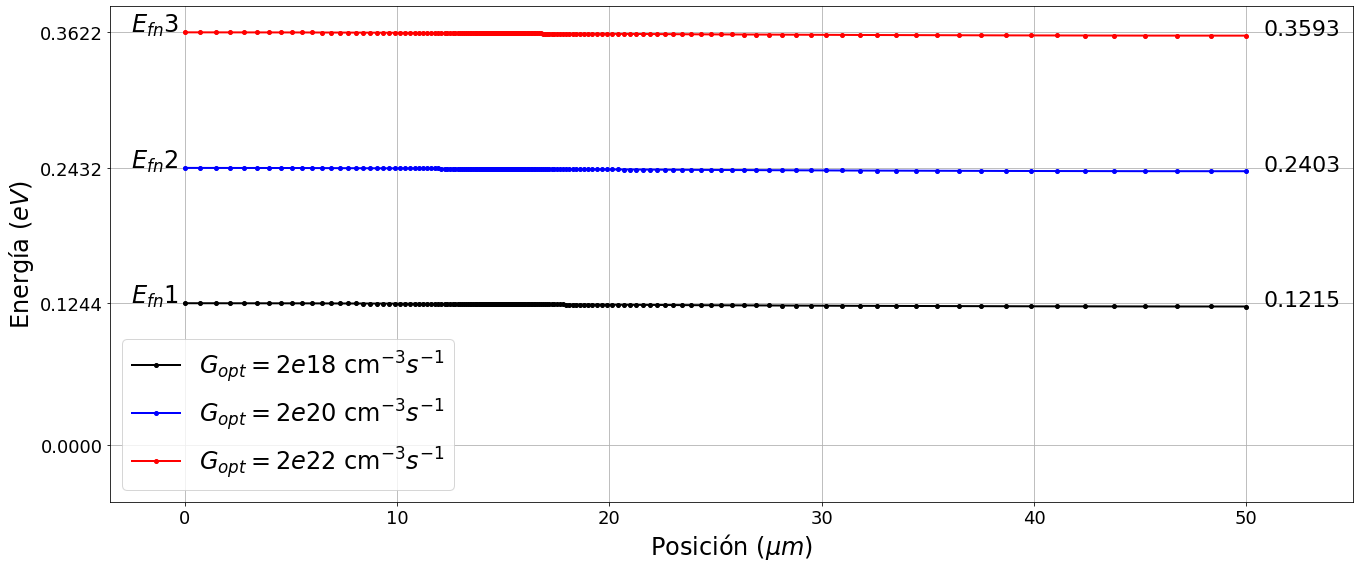

In [139]:

plt.figure(figsize=(19,8))

plt.plot(En_2[:,0],En_2[:,1],"k.-",linewidth=2,markersize=8,label=f"$G_{{opt}}=2e18$ cm$^{{-3}}s^{{-1}}$")
#plt.plot(Ep_2[:,0],Ep_2[:,1],"k.-",linewidth=2,markersize=8)

plt.plot(En_200[:,0],En_200[:,1],"b.-",linewidth=2,markersize=8,label=f"$G_{{opt}}=2e20$ cm$^{{-3}}s^{{-1}}$")
#plt.plot(Ep_200[:,0],Ep_200[:,1],"b.-",linewidth=2,markersize=8)

plt.plot(En_20000[:,0],En_20000[:,1],"r.-",linewidth=2,markersize=8,label=f"$G_{{opt}}=2e22$ cm$^{{-3}}s^{{-1}}$")
#plt.plot(Ep_20000[:,0],Ep_20000[:,1],"k.-",linewidth=2,markersize=8)

plt.grid()

plt.yticks([0,En_2[0,1],En_200[0,1],En_20000[0,1]])
#plt.yticks([0,Ep_2[0,1],Ep_200[0,1],Ep_20000[0,1]])

plt.xlabel("Posición ($\mu m$)",fontsize=24)
plt.ylabel("Energía ($eV$)",fontsize=24)

plt.text(-2.5,En_2[0,1],"$E_{fn}1$",fontsize=24)
#plt.text(-2.5,Ep_2[0,1],"$E_{fp}_1$",fontsize=24)

plt.text(-2.5,En_200[0,1],"$E_{fn}2$",fontsize=24)
#plt.text(-2.5,Ep_200[0,1],"$E_{fp}_2$",fontsize=24)

plt.text(-2.5,En_20000[0,1],"$E_{fn}3$",fontsize=24)
#plt.text(-2.5,Ep_20000[0,1],"$E_{fp}_3$",fontsize=24)




plt.text(50.8,En_2[-1,1],str(round(En_2[-1,1],4)),fontsize=22)
#plt.text(50.8,Ep_2[-1,1],str(round(Ep_2[-1,1],4)),fontsize=22)

plt.text(50.8,En_200[-1,1],str(round(En_200[-1,1],4)),fontsize=22)
#plt.text(50.8,Ep_200[-1,1],str(round(Ep_200[-1,1],4)),fontsize=22)

plt.text(50.8,En_20000[-1,1],str(round(En_20000[-1,1],4)),fontsize=22)
#plt.text(50.8,Ep_20000[-1,1],str(round(Ep_20000[-1,1],4)),fontsize=22)

plt.xlim([-3.5,55])
plt.ylim([-0.05,0.385])
plt.legend(fontsize=24)



ax=plt.gca()
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
plt.tight_layout()

#plt.savefig(f"/content/drive/MyDrive/asignaturas fisica/practica_EF/cuasiniveles_energia_n",dpi=200)



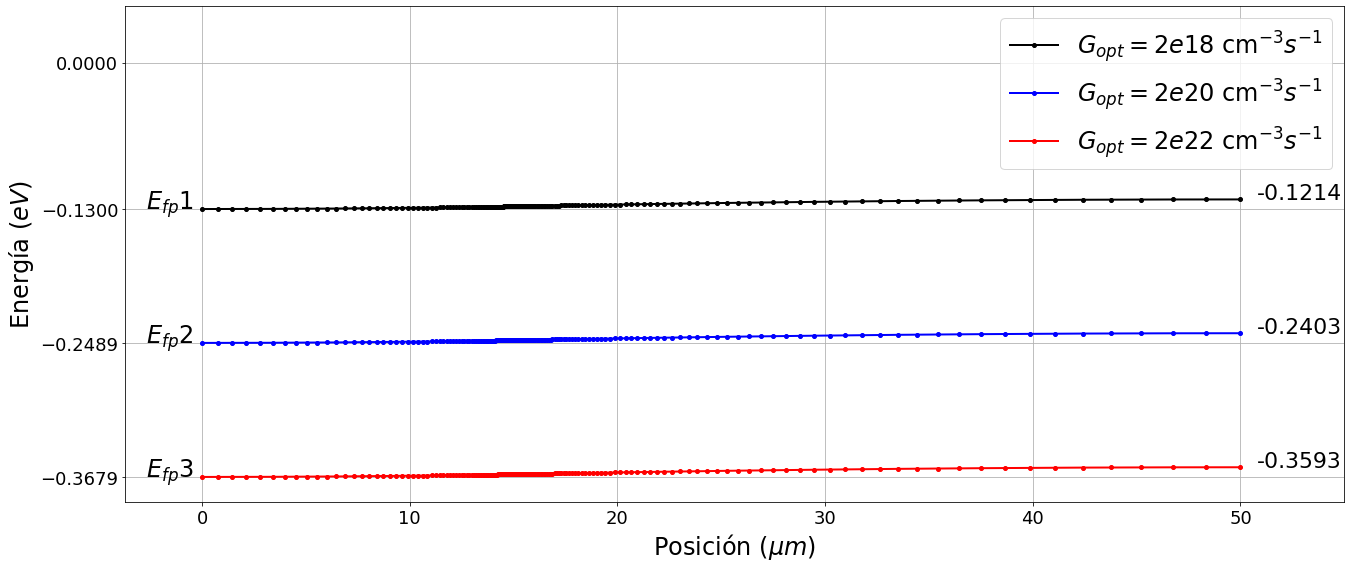

In [144]:

plt.figure(figsize=(19,8))

#plt.plot(En_2[:,0],En_2[:,1],"k.-",linewidth=2,markersize=8)
plt.plot(Ep_2[:,0],Ep_2[:,1],"k.-",linewidth=2,markersize=8,label=f"$G_{{opt}}=2e18$ cm$^{{-3}}s^{{-1}}$")

#plt.plot(En_200[:,0],En_200[:,1],"b.-",linewidth=2,markersize=8)
plt.plot(Ep_200[:,0],Ep_200[:,1],"b.-",linewidth=2,markersize=8,label=f"$G_{{opt}}=2e20$ cm$^{{-3}}s^{{-1}}$")

#plt.plot(En_20000[:,0],En_20000[:,1],"r.-",linewidth=2,markersize=8)
plt.plot(Ep_20000[:,0],Ep_20000[:,1],"r.-",linewidth=2,markersize=8,label=f"$G_{{opt}}=2e22$ cm$^{{-3}}s^{{-1}}$")

plt.grid()

#plt.yticks([0,En_2[0,1],En_200[0,1],En_20000[0,1]])
plt.yticks([0,Ep_2[0,1],Ep_200[0,1],Ep_20000[0,1]])

plt.xlabel("Posición ($\mu m$)",fontsize=24)
plt.ylabel("Energía ($eV$)",fontsize=24)

#plt.text(-2.5,En_2[0,1],"$E_{fn}1$",fontsize=24)
plt.text(-2.7,Ep_2[0,1],"$E_{fp}1$",fontsize=24)

#plt.text(-2.5,En_200[0,1],"$E_{fn}2$",fontsize=24)
plt.text(-2.7,Ep_200[0,1],"$E_{fp}2$",fontsize=24)

#plt.text(-2.5,En_20000[0,1],"$E_{fn}3$",fontsize=24)
plt.text(-2.7,Ep_20000[0,1],"$E_{fp}3$",fontsize=24)




#plt.text(50.8,En_2[-1,1],str(round(En_2[-1,1],4)),fontsize=22)
plt.text(50.8,Ep_2[-1,1],str(round(Ep_2[-1,1],4)),fontsize=22)

#plt.text(50.8,En_200[-1,1],str(round(En_200[-1,1],4)),fontsize=22)
plt.text(50.8,Ep_200[-1,1],str(round(Ep_200[-1,1],4)),fontsize=22)

#plt.text(50.8,En_20000[-1,1],str(round(En_20000[-1,1],4)),fontsize=22)
plt.text(50.8,Ep_20000[-1,1],str(round(Ep_20000[-1,1],4)),fontsize=22)

plt.xlim([-3.7,55])
plt.ylim([-0.39,0.05])
plt.legend(fontsize=24)




ax=plt.gca()
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
plt.tight_layout()

plt.savefig(f"/content/drive/MyDrive/asignaturas fisica/practica_EF/cuasiniveles_energia_p",dpi=200)



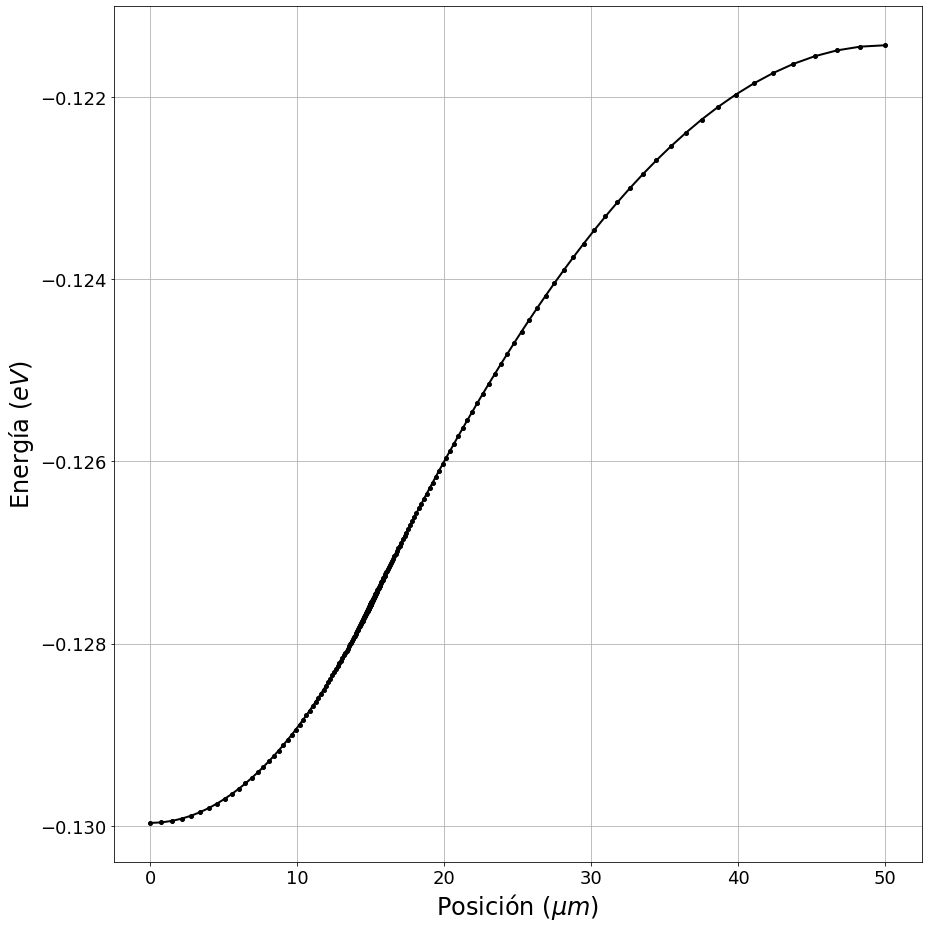

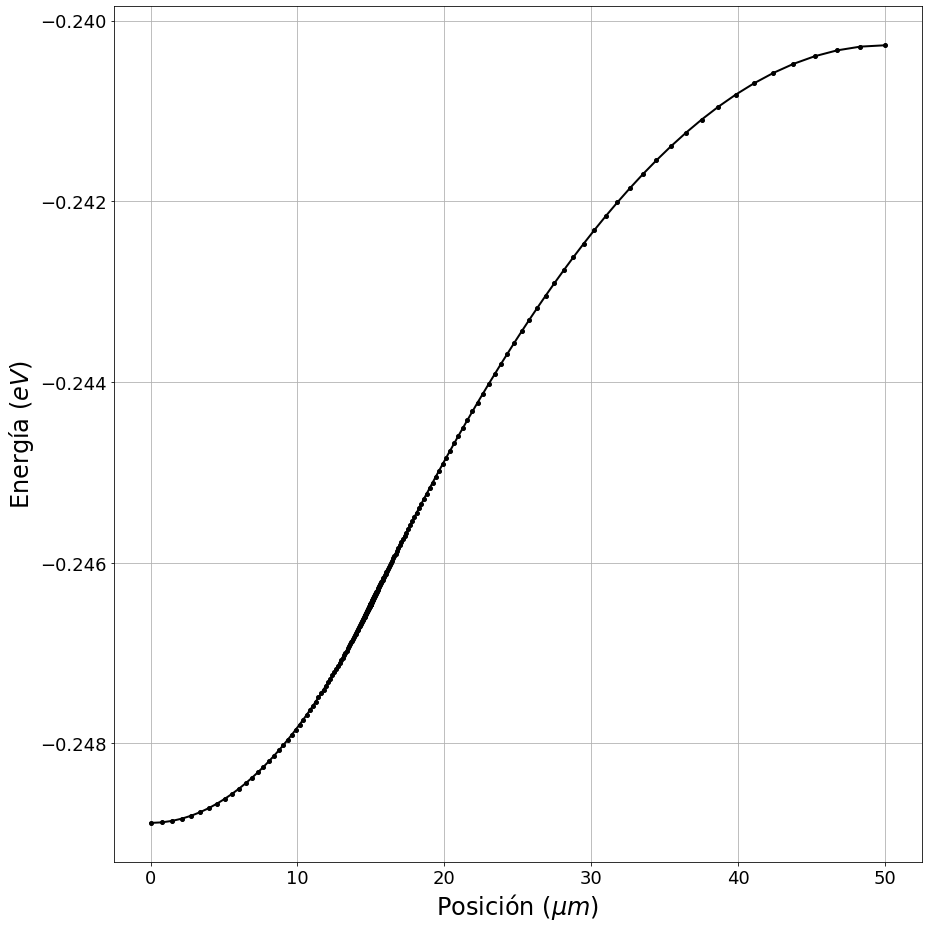

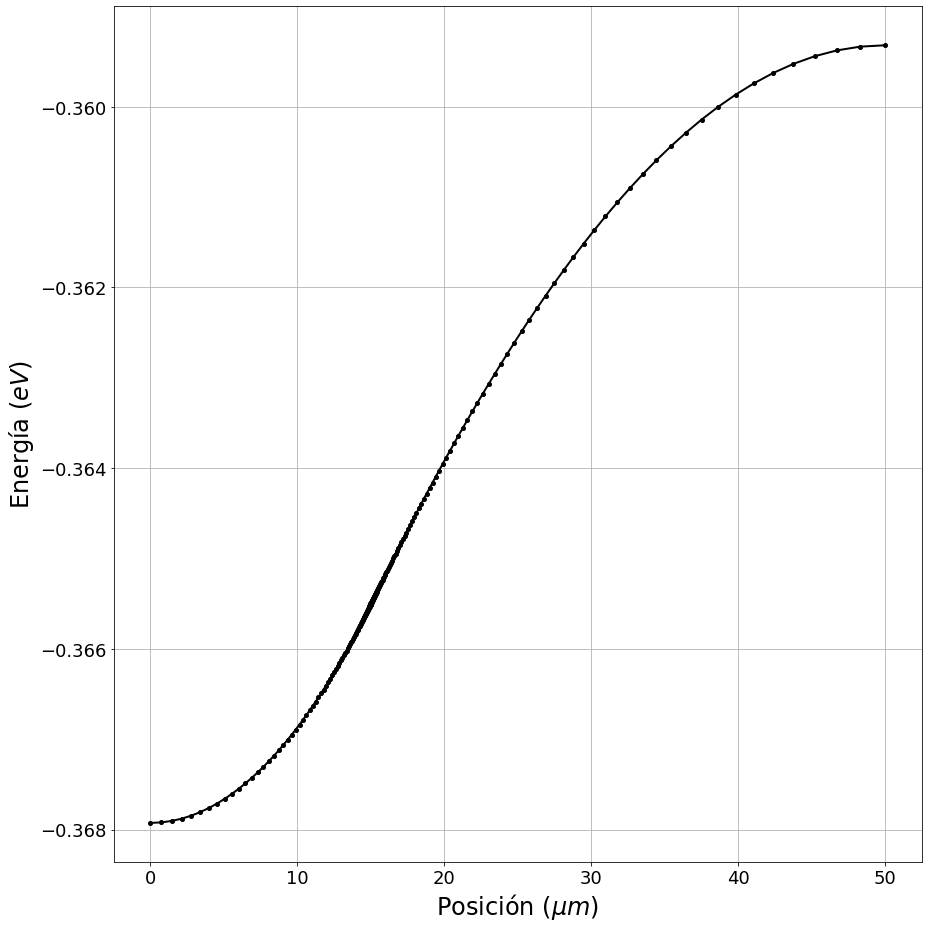

In [134]:
plt.figure(figsize=(13,13))

plt.plot(Ep_2[:,0],Ep_2[:,1],"k.-",linewidth=2,markersize=8)

plt.grid()
ax=plt.gca()
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
plt.xlabel("Posición ($\mu m$)",fontsize=24)
plt.ylabel("Energía ($eV$)",fontsize=24)

plt.tight_layout()
plt.savefig(f"/content/drive/MyDrive/asignaturas fisica/practica_EF/cuasinivel_energia_p_G_2",dpi=200)


plt.figure(figsize=(13,13))
plt.plot(Ep_200[:,0],Ep_200[:,1],"k.-",linewidth=2,markersize=8)

plt.grid()
ax=plt.gca()
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
plt.xlabel("Posición ($\mu m$)",fontsize=24)
plt.ylabel("Energía ($eV$)",fontsize=24)

plt.tight_layout()
plt.savefig(f"/content/drive/MyDrive/asignaturas fisica/practica_EF/cuasinivel_energia_p_G_200",dpi=200)



plt.figure(figsize=(13,13))
plt.plot(Ep_20000[:,0],Ep_20000[:,1],"k.-",linewidth=2,markersize=8)

plt.grid()
ax=plt.gca()
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
plt.xlabel("Posición ($\mu m$)",fontsize=24)
plt.ylabel("Energía ($eV$)",fontsize=24)

plt.tight_layout()
plt.savefig(f"/content/drive/MyDrive/asignaturas fisica/practica_EF/cuasinivel_energia_p_G_20000",dpi=200)




